# Exploring the Data and Analysis

## Phase 1 Goals
<ul>
<li> Discover the most highly correlated features via headmat and SPA </li>
<li> Explore trends via filtering in Tableau </li>
<li> Testing for effect of possible inidcators of solar production </li>
<li> Preesnt findings in presentation </li>
</ul>


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
# import pymc3 as pm


In [2]:
# import datasets

# SoBu
esxv1 = pd.read_csv('esxv1_dense_feb2.csv')
kbtv = pd.read_csv('kbtv_dense_feb2.csv')
# sobu_ds = pd.read_csv()

# NAVA
lsc07 = pd.read_csv('lsc07_dense_feb2.csv')
vtw12 = pd.read_csv('vtw12_dense_feb2.csv')
# nava_ds = pd.read_csv()

## Drop Columns
Unless we need these features to filter, we can drop them from the data for plotting figures

In [3]:
esxv1.drop(['Elevation', 'Latitude', 'Longitude', 'Station_ID', 'AC_Cap', 'Array_Azimuth', 'Array_Tilt'], inplace = True, axis = 1)
kbtv.drop(['Elevation', 'Latitude', 'Longitude', 'Station_ID', 'AC_Cap', 'Array_Azimuth', 'Array_Tilt'], inplace = True, axis = 1)
lsc07.drop(['Elevation', 'Latitude', 'Longitude', 'Station_ID'], inplace = True, axis = 1)
vtw12.drop(['Elevation', 'Latitude', 'Longitude', 'Station_ID'], inplace = True, axis = 1)

In [4]:
# this set is labled with the `weather_condition_set_1d` feature.  Using this label we are able to filter the data easily
# kbtv.weather_condition_set_1d.replace({'Smoke': 'Clear'}, inplace = True)

In [5]:
esxv1.columns

Index(['DC_Cap', 'Hourly_kWh_avg', 'Top. azimuth angle (eastward from N)',
       'Top. azimuth angle (westward from S)', 'Topocentric zenith angle',
       'air_temp_set_1', 'dew_point_temperature_set_1d', 'kWh',
       'peak_wind_direction_set_1', 'peak_wind_speed_set_1',
       'precip_accum_set_1', 'relative_humidity_set_1',
       'solar_radiation_set_1', 'volt_set_1', 'wind_cardinal_direction_set_1d',
       'wind_direction_set_1', 'wind_gust_set_1', 'wind_speed_set_1',
       'timestamp_'],
      dtype='object')

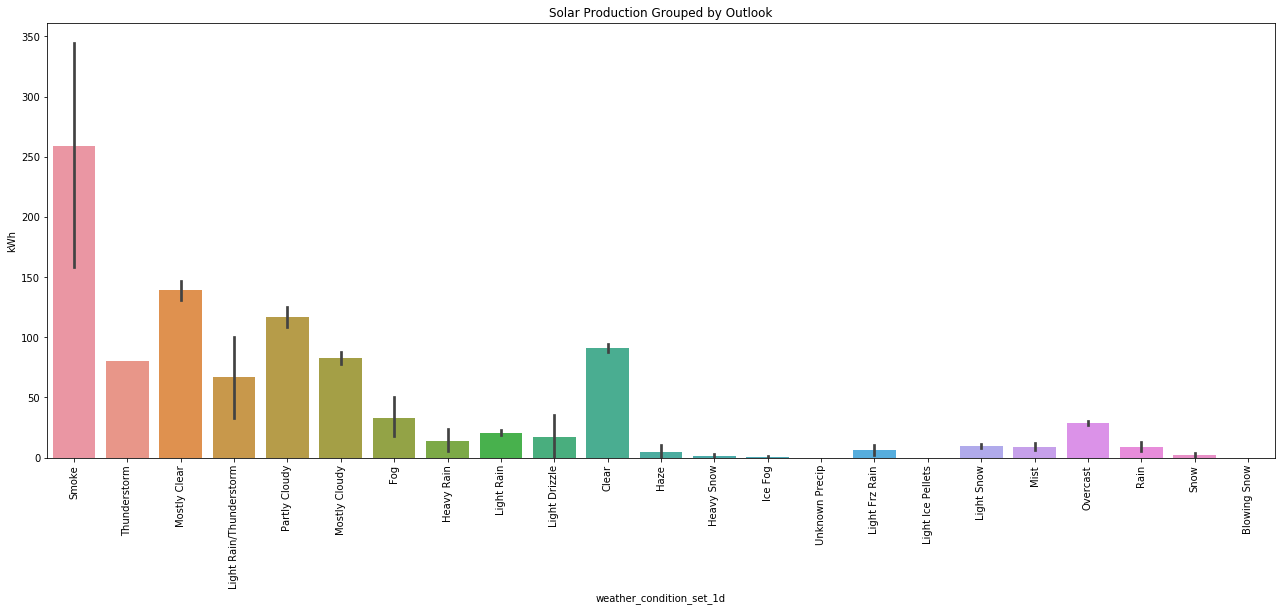

In [6]:
box_data = pd.DataFrame({col:vals['kWh'] for col,vals in kbtv.groupby('weather_condition_set_1d')})
meds2 = box_data.median()
meds2.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots(figsize = (22,8))
chart = sns.barplot(x='weather_condition_set_1d',y='kWh', data=kbtv, order=meds2.index, ax = ax)
plt.xticks(rotation = 90)
plt.title('Solar Production Grouped by Outlook')
plt.show()
fig.savefig('kwh_by_outlook.png')

### Distribution of Outputs

In [7]:
# for column in continuous_df:
#     continuous_df[column].plot.hist(normed=True, label = column+' histogram')
#     continuous_df[column].plot.kde(label =column+' kde')
#     plt.legend()
#     plt.show()

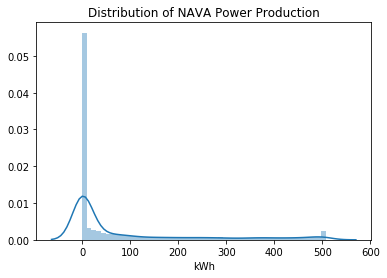

In [8]:
# Nava
distribution = sns.distplot(lsc07.kWh).set_title("Distribution of NAVA Power Production")
distplot = distribution.get_figure()
distplot.savefig("output.png")

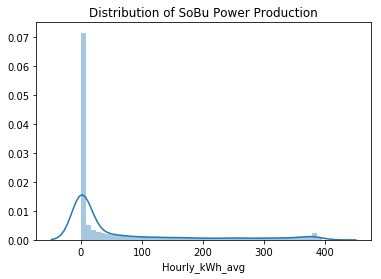

In [9]:
# SoBu
distribution = sns.distplot(kbtv.Hourly_kWh_avg).set_title("Distribution of SoBu Power Production")
distplot = distribution.get_figure()
distplot.savefig("output.png")

Night time values are accounting for half of the samples creating bivariate data.  In the past I've put in place hard stops to deal with this.  We can train a model on daytime values only but we will need to 

In [10]:
# fig, ax = plt.subplots()

# grouped = model_copy.groupby('summary')
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='pressure', y='temperature',
#                label=key, color=color[key], alpha=0.65)
# plt.xlabel('Pressure in Pa')
# plt.ylabel("Temperature in F")
# plt.title("Comparing  Features of Burlington Weather")
# fig.savefig("summary2.png")
# plt.show();

### Heatmap

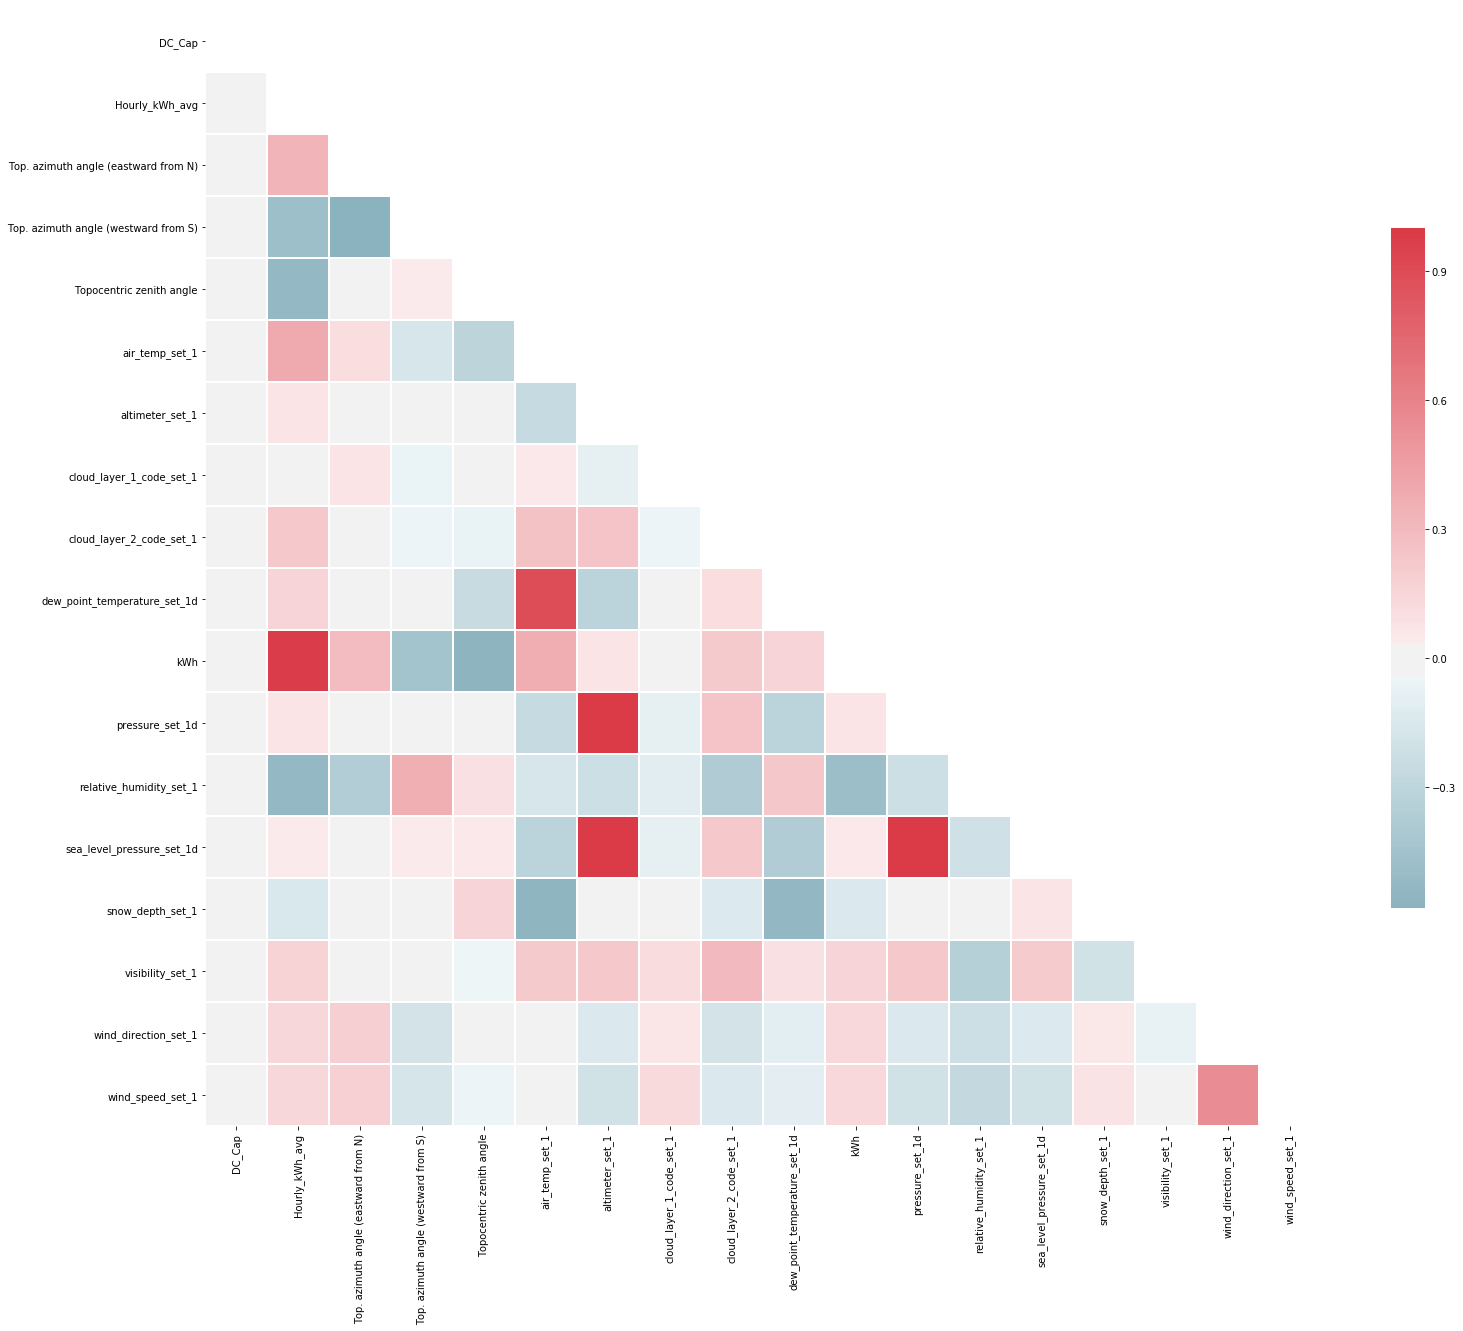

In [11]:
# 
corr = kbtv.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

f.savefig('kbtv_heatmap.png')

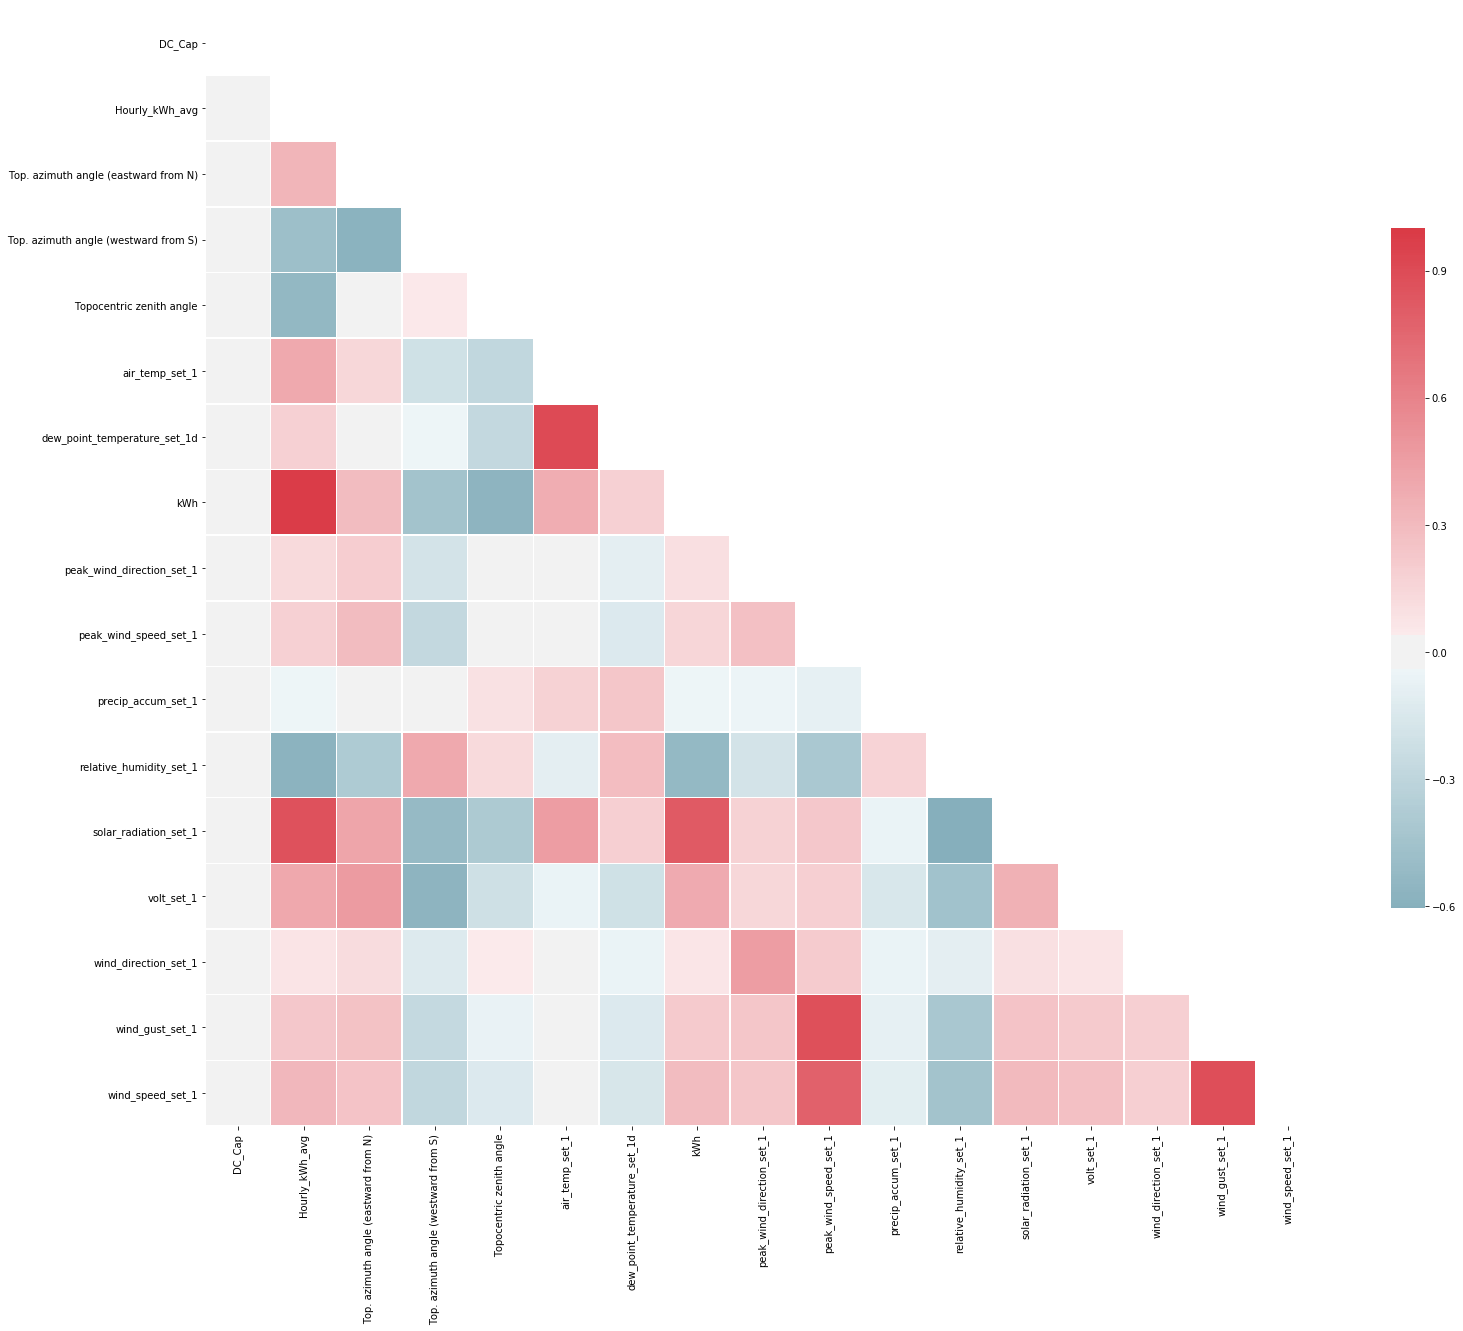

In [12]:
corr = esxv1.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

f.savefig('esxv1_heatmap.png')

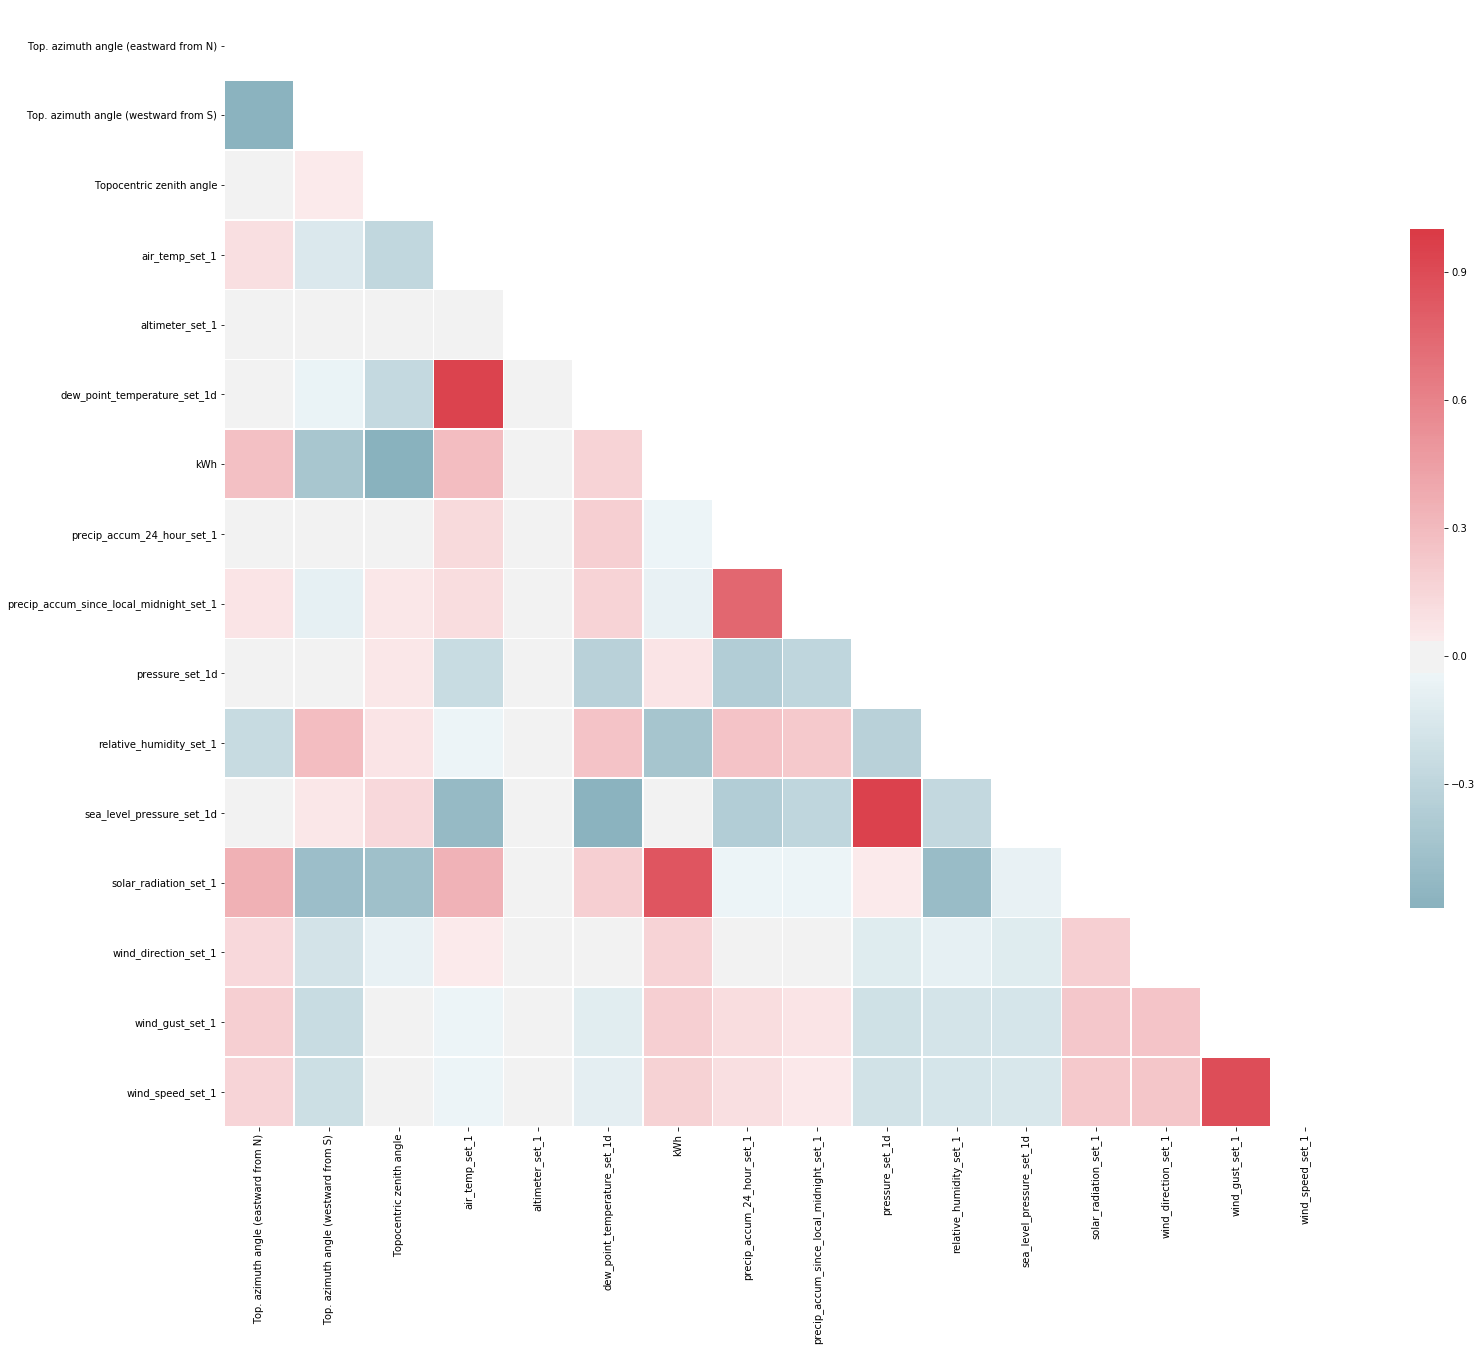

In [13]:
corr = lsc07.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

f.savefig('lsc07_heatmap.png')

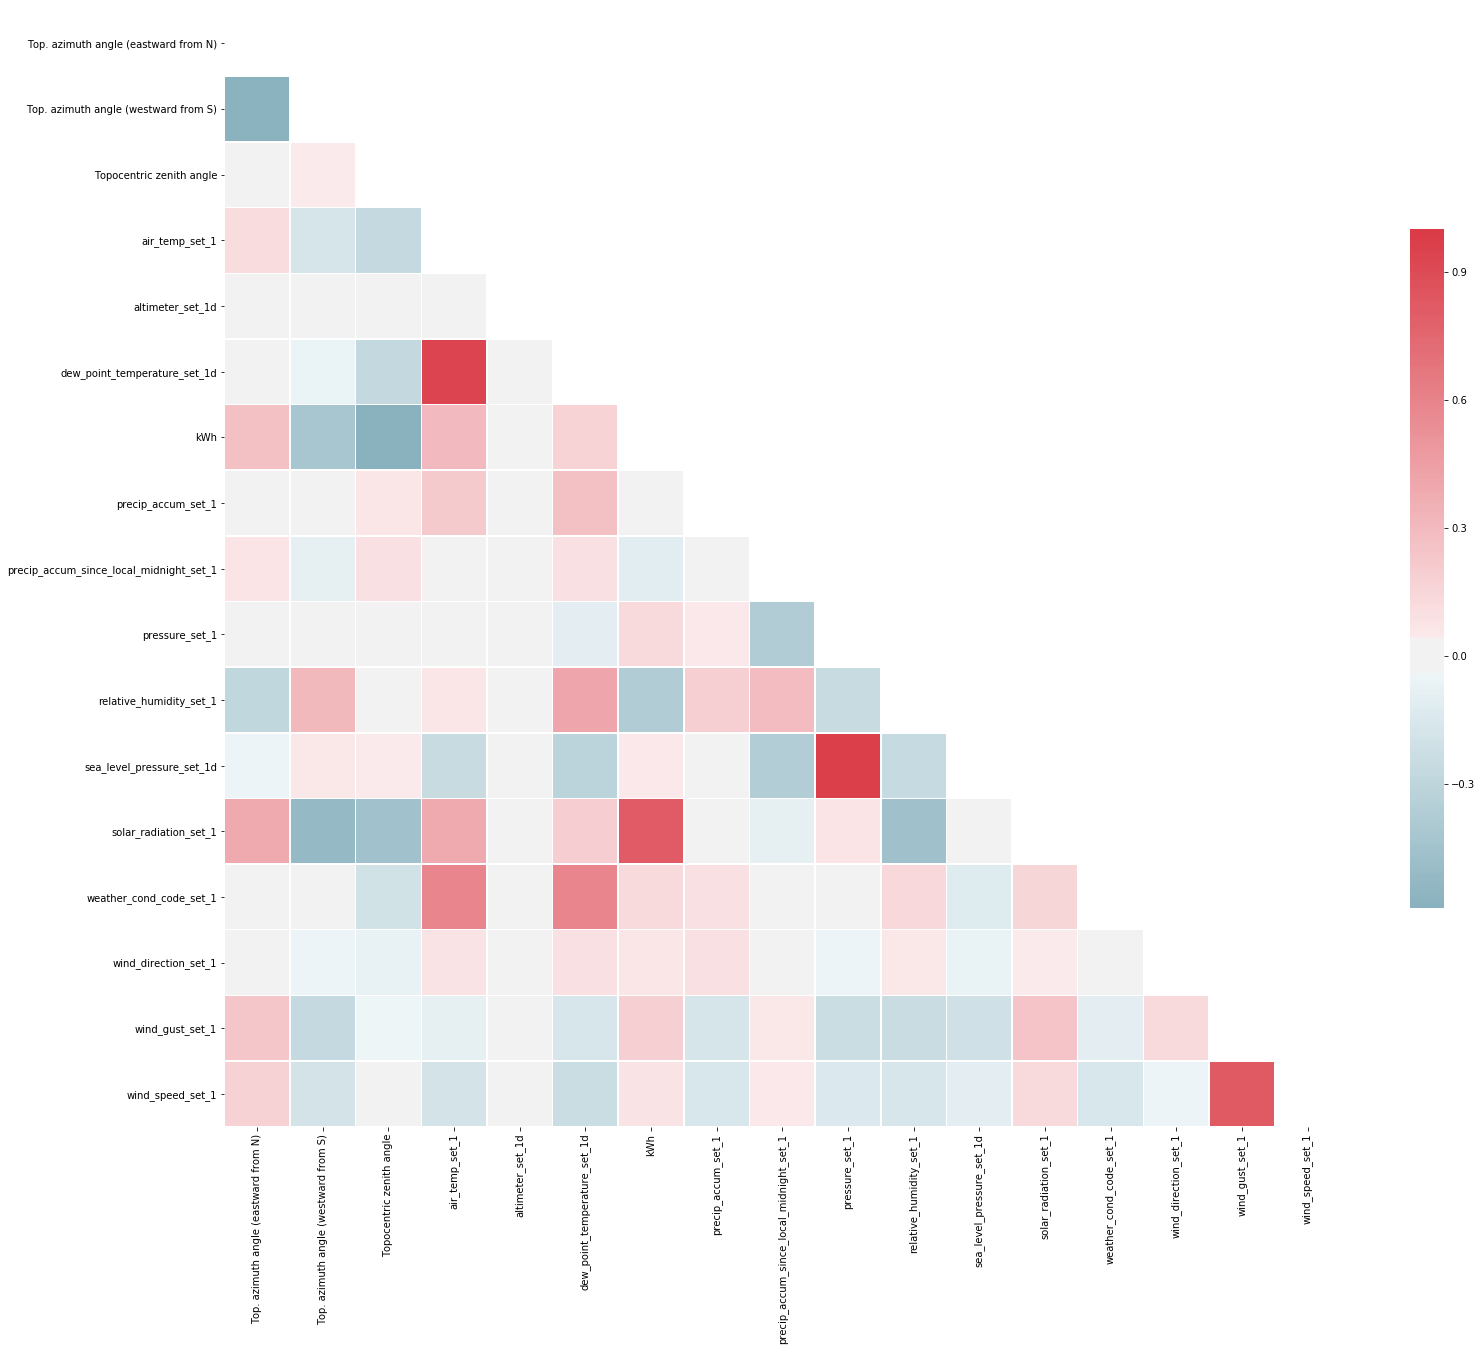

In [14]:
corr = vtw12.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

f.savefig('vtw12_heatmap.png')

# Radiation vs Power Output

#### This measure serves as a validator.  If the radiation sensors at the weather stations provided match the energy production of the solar farm.  Values will be min max normalized to begin.
if the power porduction turns out to be logrithmic (which it likely is) a decision will have to be made regarding night values.

In [15]:
%who

ax	 box_data	 chart	 cmap	 corr	 distplot	 distribution	 esxv1	 f	 
fig	 kbtv	 lsc07	 mask	 meds2	 np	 pd	 plt	 sns	 
st	 vtw12	 


In [16]:
esxv1.columns

Index(['DC_Cap', 'Hourly_kWh_avg', 'Top. azimuth angle (eastward from N)',
       'Top. azimuth angle (westward from S)', 'Topocentric zenith angle',
       'air_temp_set_1', 'dew_point_temperature_set_1d', 'kWh',
       'peak_wind_direction_set_1', 'peak_wind_speed_set_1',
       'precip_accum_set_1', 'relative_humidity_set_1',
       'solar_radiation_set_1', 'volt_set_1', 'wind_cardinal_direction_set_1d',
       'wind_direction_set_1', 'wind_gust_set_1', 'wind_speed_set_1',
       'timestamp_'],
      dtype='object')

In [17]:
lsc07_sol = lsc07['solar_radiation_set_1']
lsc07_prod = lsc07['kWh']
kbtv_temp = kbtv['air_temp_set_1']
kbtv_prod = kbtv['Hourly_kWh_avg']
vtw12_sol = vtw12['solar_radiation_set_1']
vtw12_prod = vtw12['kWh']
esxv1_sol = esxv1['solar_radiation_set_1']
esxv1_prod = esxv1['Hourly_kWh_avg']

In [18]:
# imports and such
from sklearn import preprocessing

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

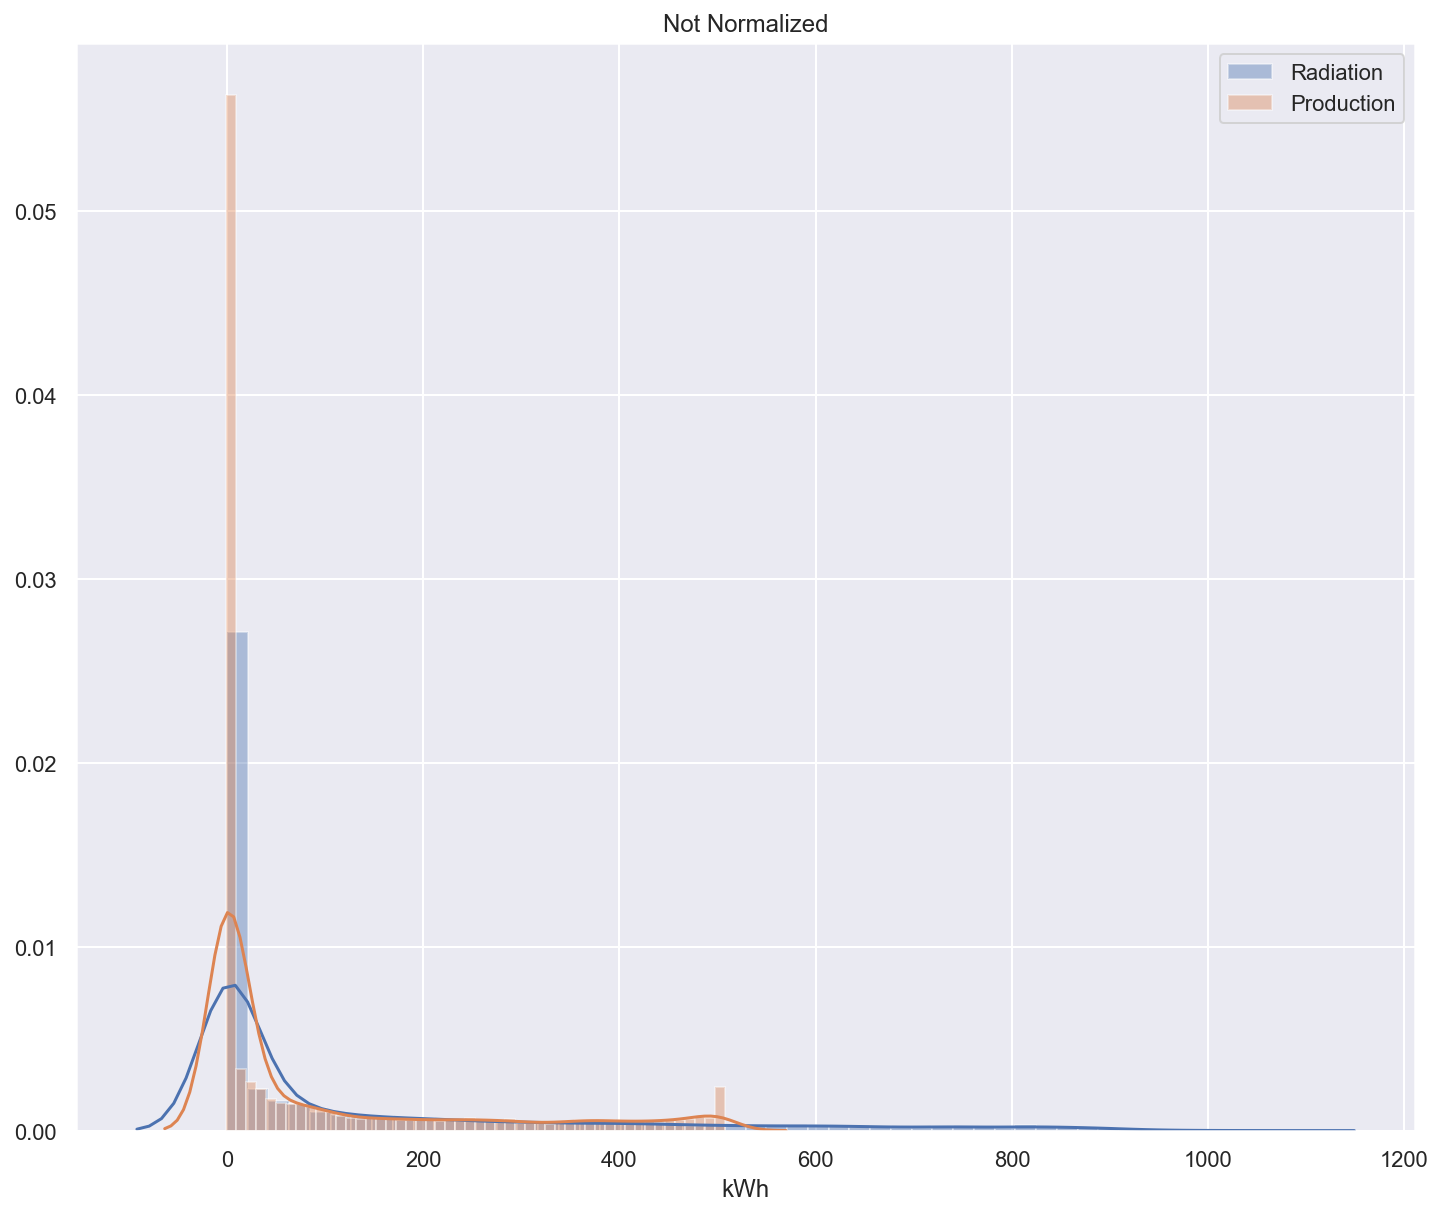

In [25]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(lsc07_sol, label='Radiation')
sns.distplot(lsc07_prod, label='Production') 
plt.title('Not Normalized')
plt.legend()
plt.show();

In [51]:
esxv1.columns

Index(['DC_Cap', 'Hourly_kWh_avg', 'Top. azimuth angle (eastward from N)',
       'Top. azimuth angle (westward from S)', 'Topocentric zenith angle',
       'air_temp_set_1', 'dew_point_temperature_set_1d', 'kWh',
       'peak_wind_direction_set_1', 'peak_wind_speed_set_1',
       'precip_accum_set_1', 'relative_humidity_set_1',
       'solar_radiation_set_1', 'volt_set_1', 'wind_cardinal_direction_set_1d',
       'wind_direction_set_1', 'wind_gust_set_1', 'wind_speed_set_1',
       'timestamp_'],
      dtype='object')

In [56]:
min_max_scaler = preprocessing.MinMaxScaler()

lsc07_scaled = min_max_scaler.fit_transform(lsc07.loc[:,['kWh', 'solar_radiation_set_1']])
lsc07_normalized = pd.DataFrame(lsc07_scaled)

vtw12_scaled = min_max_scaler.fit_transform(vtw12.loc[:, ['kWh', 'solar_radiation_set_1']])
vtw12_normalized = pd.DataFrame(vtw12_scaled)

kbtv_scaled = min_max_scaler.fit_transform(kbtv.loc[:, ['Hourly_kWh_avg', 'air_temp_set_1']])
kbtv_normalized = pd.DataFrame(kbtv_scaled)

esxv1_scaled = min_max_scaler.fit_transform(esxv1.loc[:, ['Hourly_kWh_avg', 'solar_radiation_set_1']])
esxv1_normalized = pd.DataFrame(esxv1_scaled)

esxv1_scaled = min_max_scaler.fit_transform(esxv1.loc[:, ['Hourly_kWh_avg', 'air_temp_set_1']])
esxv1_air_temp_normalized = pd.DataFrame(esxv1_scaled)

normalized_metrics = [esxv1_normalized, esxv1_air_temp_normalized, kbtv_normalized, lsc07_normalized, vtw12_normalized]
lazy_keys = ['ESXV1', 'ESXV1 (Air Temp)', 'KBTV (Air Temp)', 'LSC07', 'VTW12']

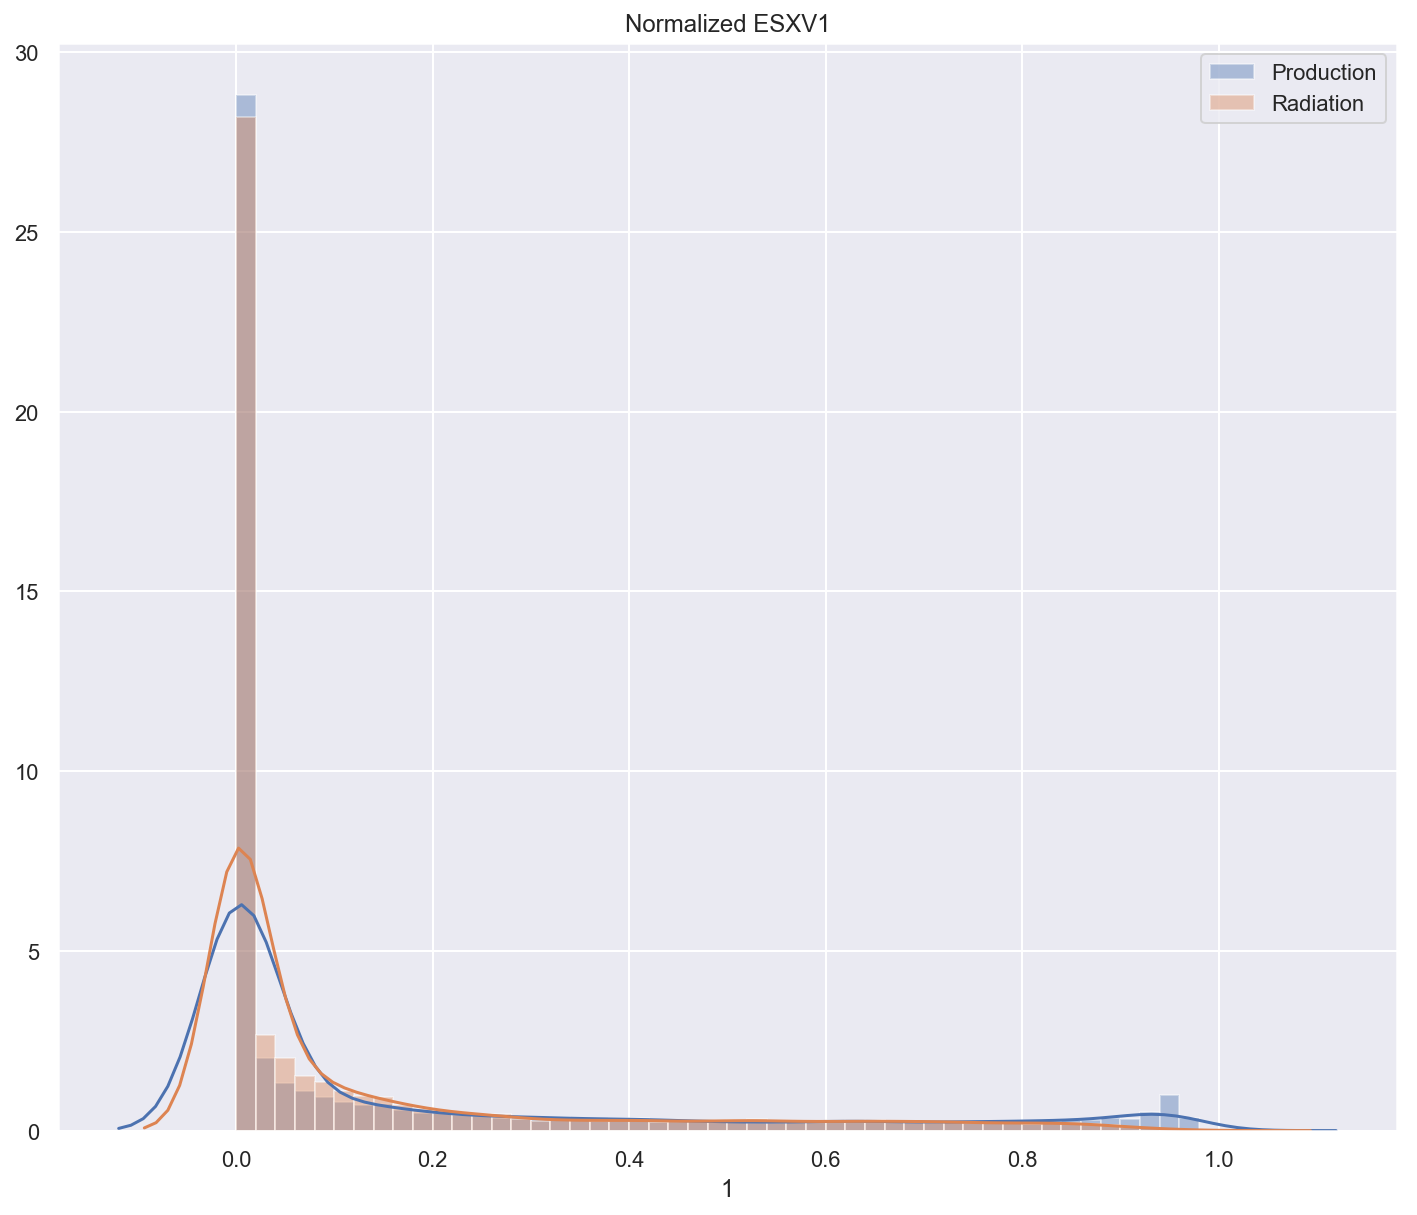

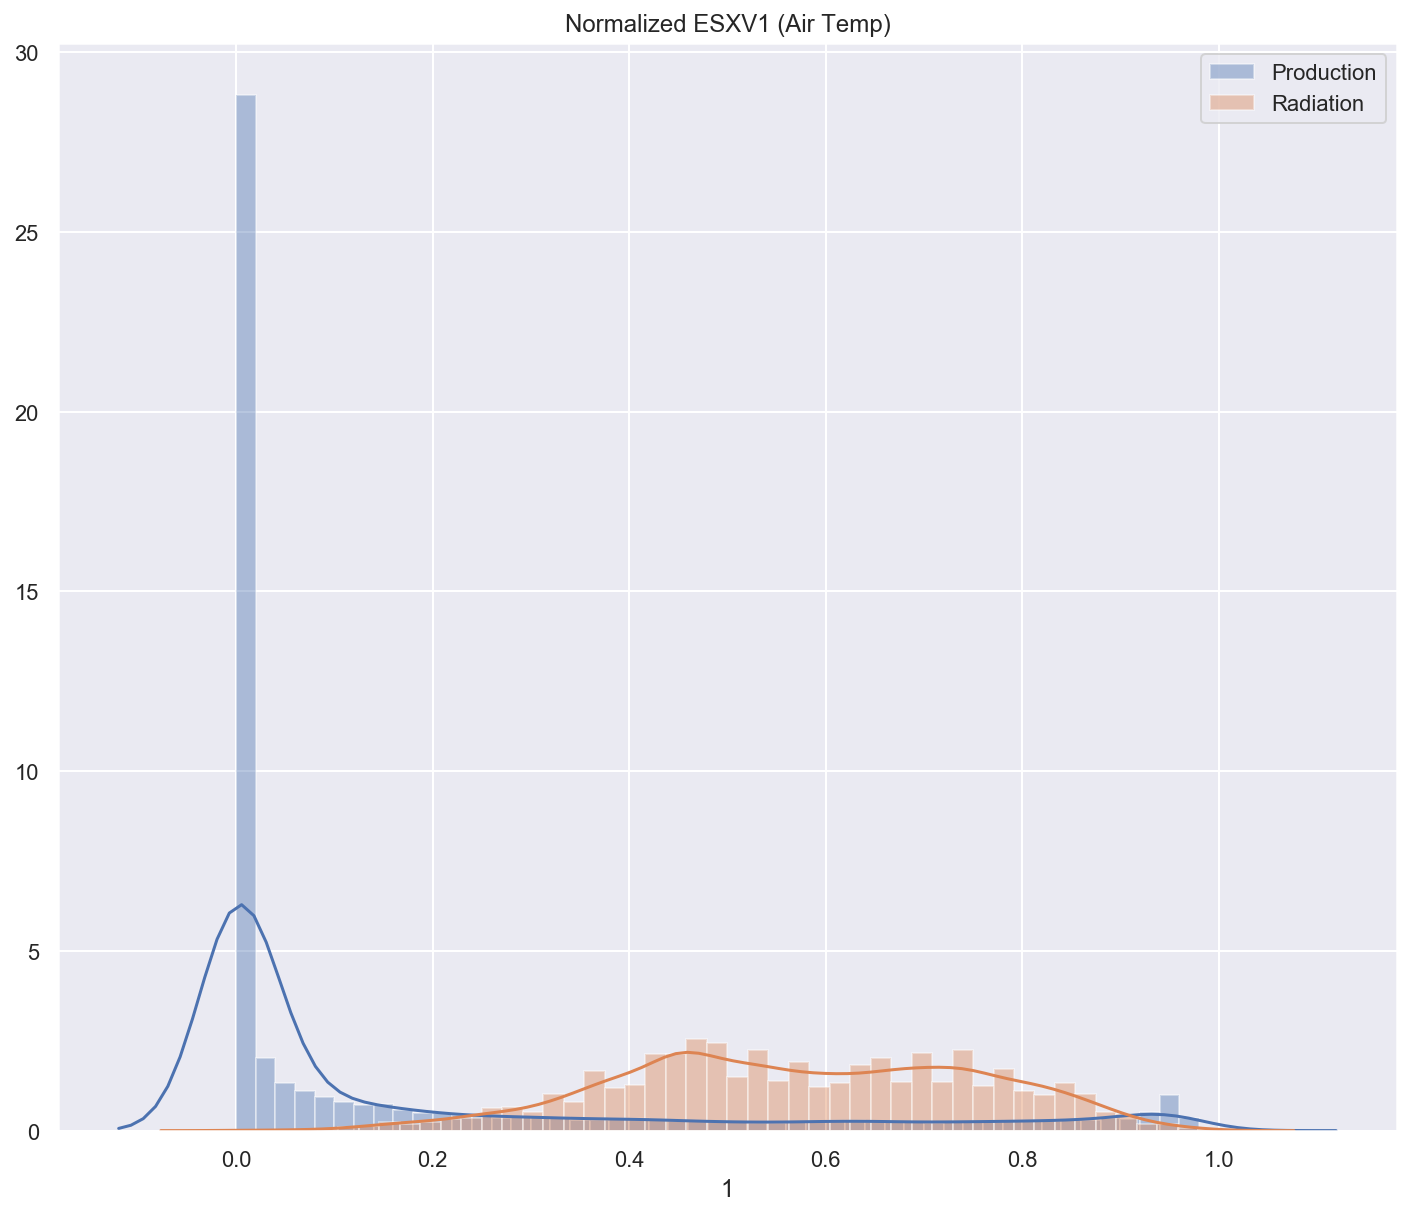

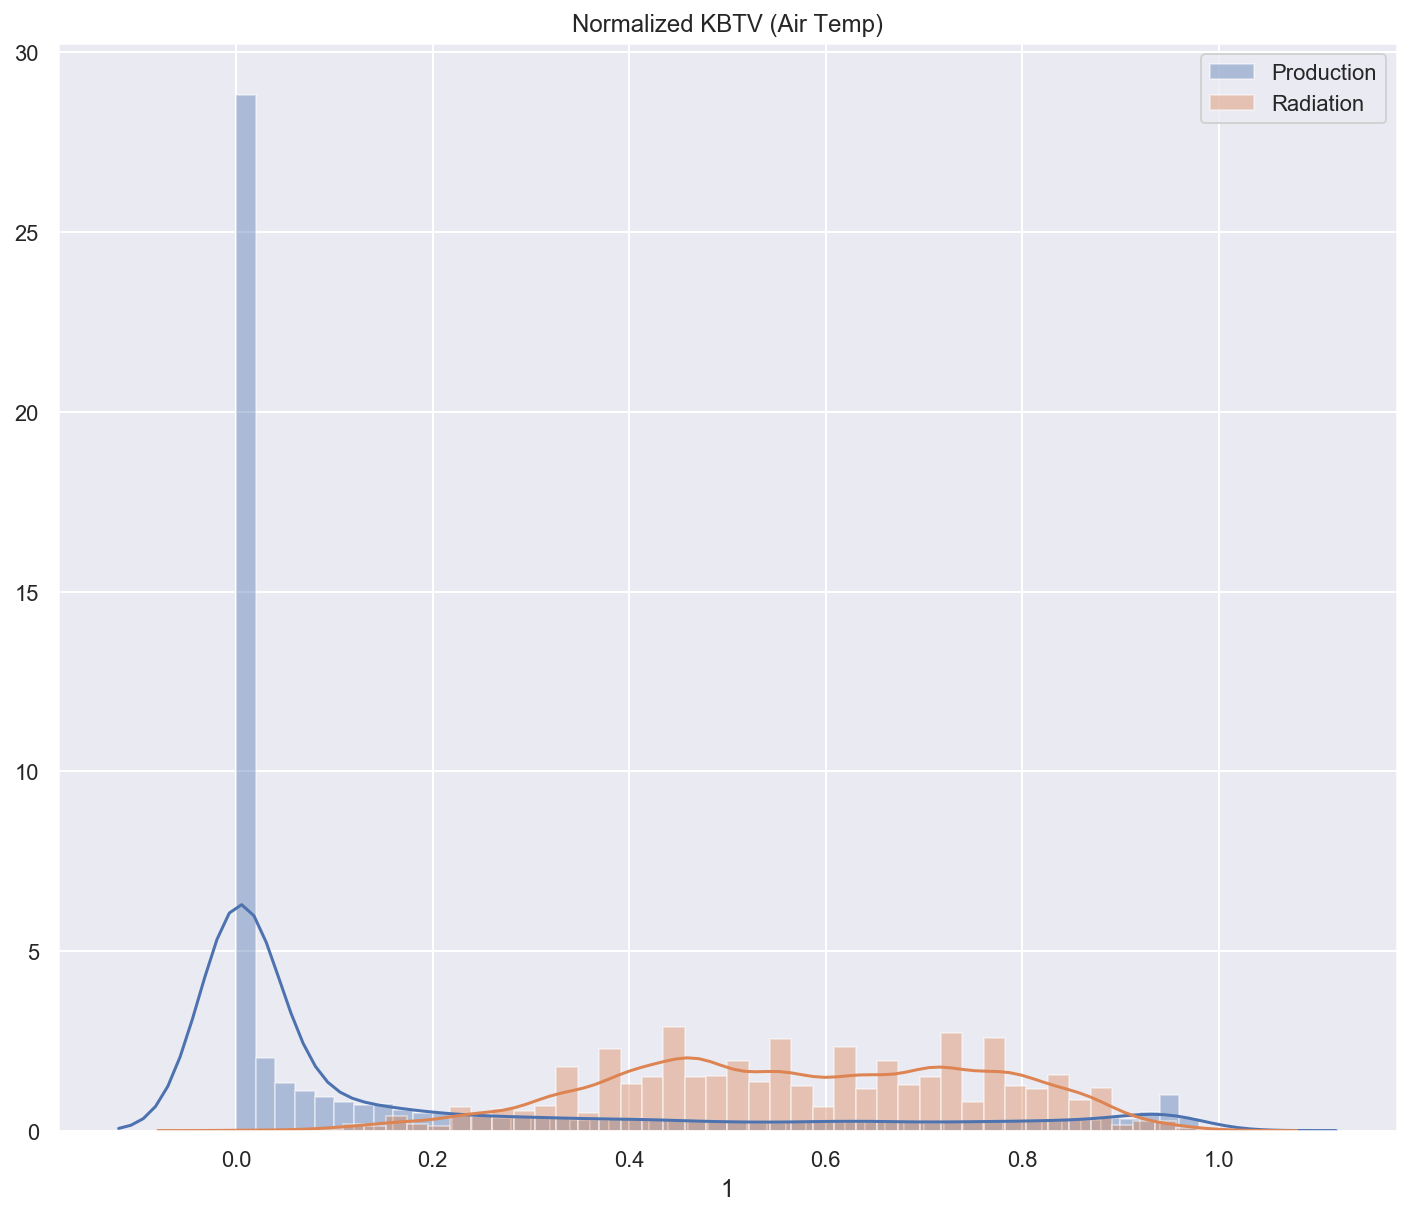

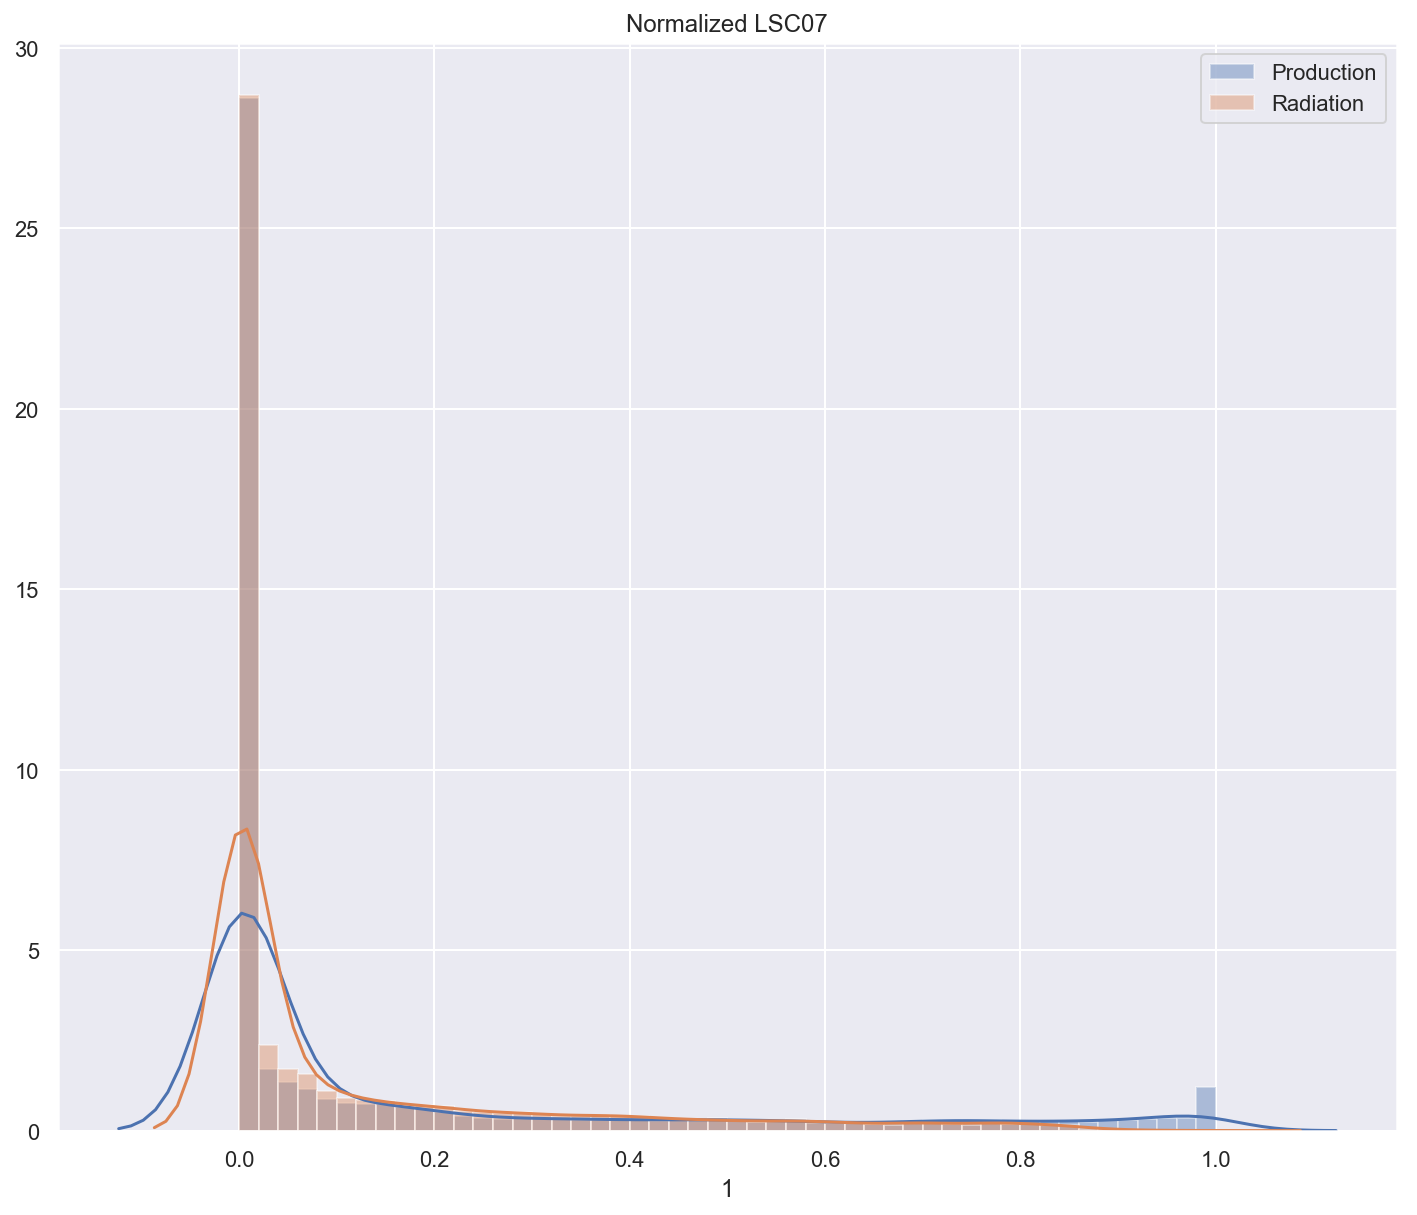

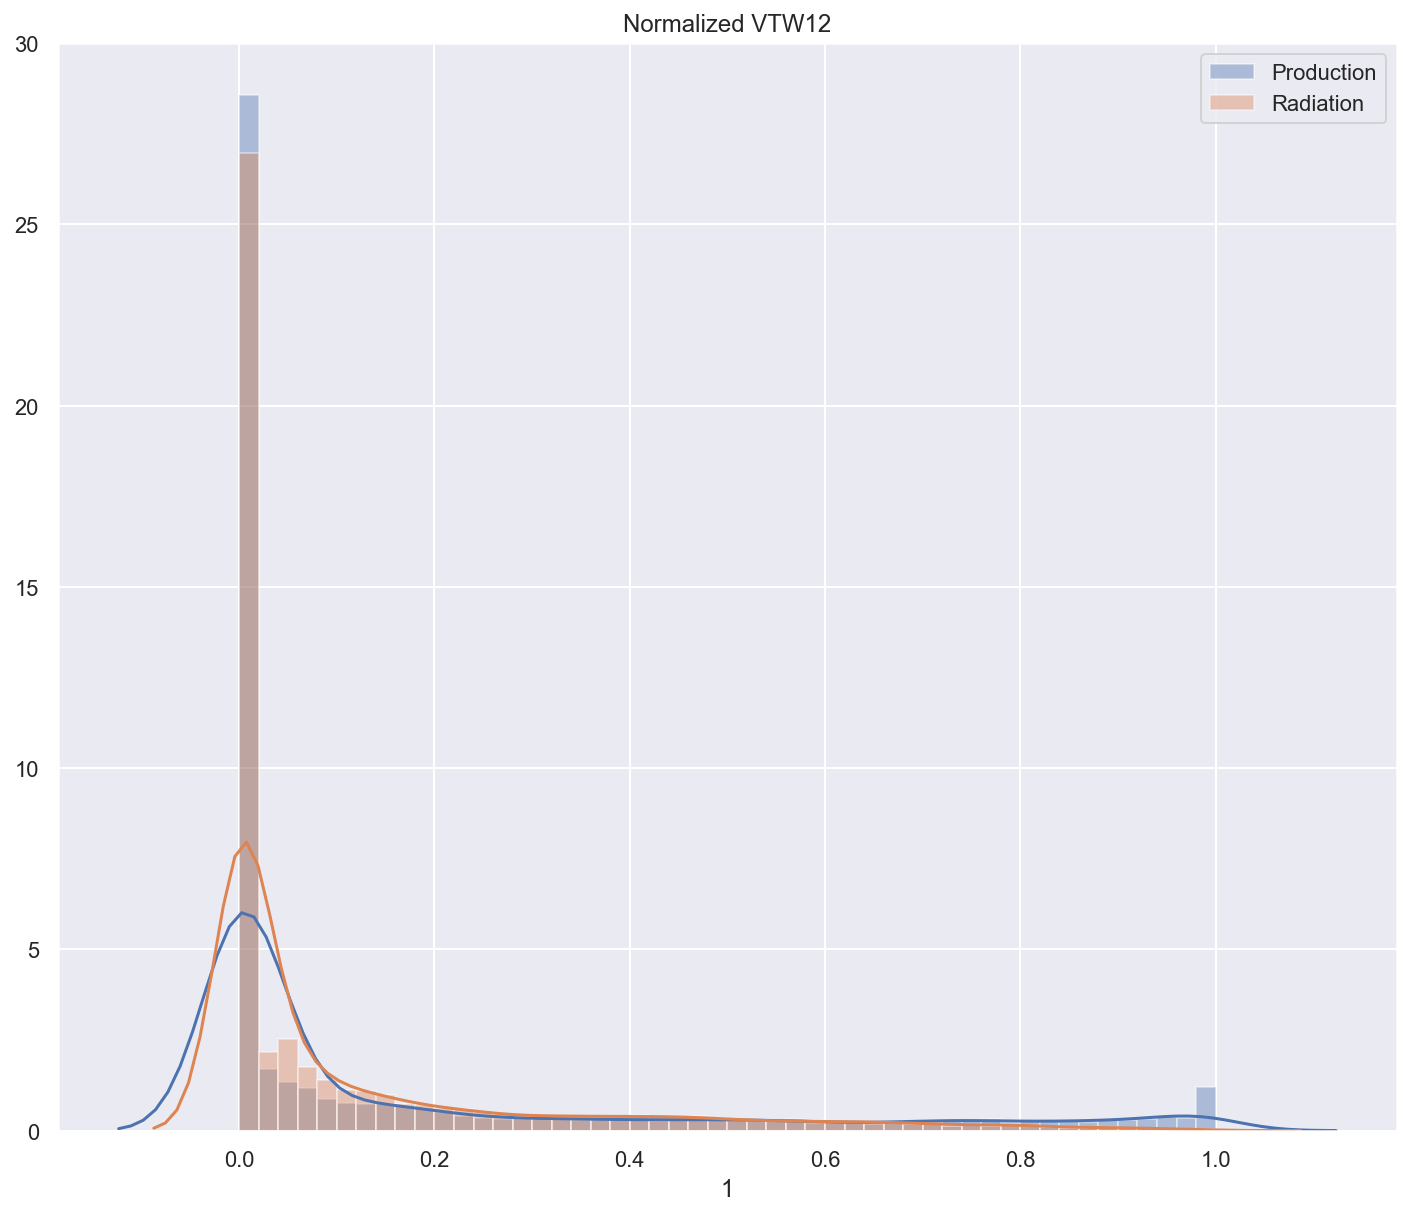

In [57]:
for idx, val in enumerate(normalized_metrics):
    sns.set(color_codes=True)
    sns.set(rc={'figure.figsize':(12,10)})
    sns.distplot(val[0], label='Production')
    sns.distplot(val[1], label='Radiation') 
    plt.title(f'Normalized {lazy_keys[idx]}')
    plt.legend()
    plt.show();

In [44]:
#Two Sample T Test
for idx, val in enumerate(normalized_metrics):
    mu1 = val[0].mean()
    mu2 = val[1].mean()
    std1 = val[0].std(ddof=1)
    std2 = val[1].std(ddof=1)
    n1 = len(val[0])
    n2 = len(val[1])

    num = (n1-1)*std1**2 + (n2-1)*std2**2
    den = n1 + n2 - 2
    pooled_std = np.sqrt(num/den)
    print(f'T stat and P val of {lazy_keys[idx]}')
    print(f'Both SDs pooled into one number: {pooled_std}\n')

    se = pooled_std*np.sqrt((n2+n1)/(n1*n2))
    print(f'standard error: {se}')

    ## Calculate T stat

    t = ((mu1-mu2)/se)
    print(f'T Stat: {t}')


    ## Calculate p_value


    p_value = 1. - st.t.cdf(t, ((len(lsc07_normalized[0])+len(lsc07_normalized[1]))-2), 0, 1)
    print(f'P Value: {p_value}')
    print('\n\n')

T stat and P val of ESXV1
Both SDs pooled into one number: 0.2522295599331602

standard error: 0.0026932942613095657
T Stat: 15.508127721240951
P Value: 0.0



T stat and P val of KBTV
Both SDs pooled into one number: 0.23878317013308675

standard error: 0.0025494963948138895
T Stat: -160.24444673330484
P Value: 1.0



T stat and P val of LSC07
Both SDs pooled into one number: 0.2508991346901253

standard error: 0.0026816882892466134
T Stat: 20.73014358523776
P Value: 0.0



T stat and P val of VTW12
Both SDs pooled into one number: 0.25164414730666324

standard error: 0.0026923438304712077
T Stat: 18.89362548217346
P Value: 0.0





In [28]:
import scipy.stats


In [47]:

def evaluate_PDF(rv, x=10):
    '''Input: a random variable object, standard deviation
       output : x and y values for the normal distribution
       '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values
 




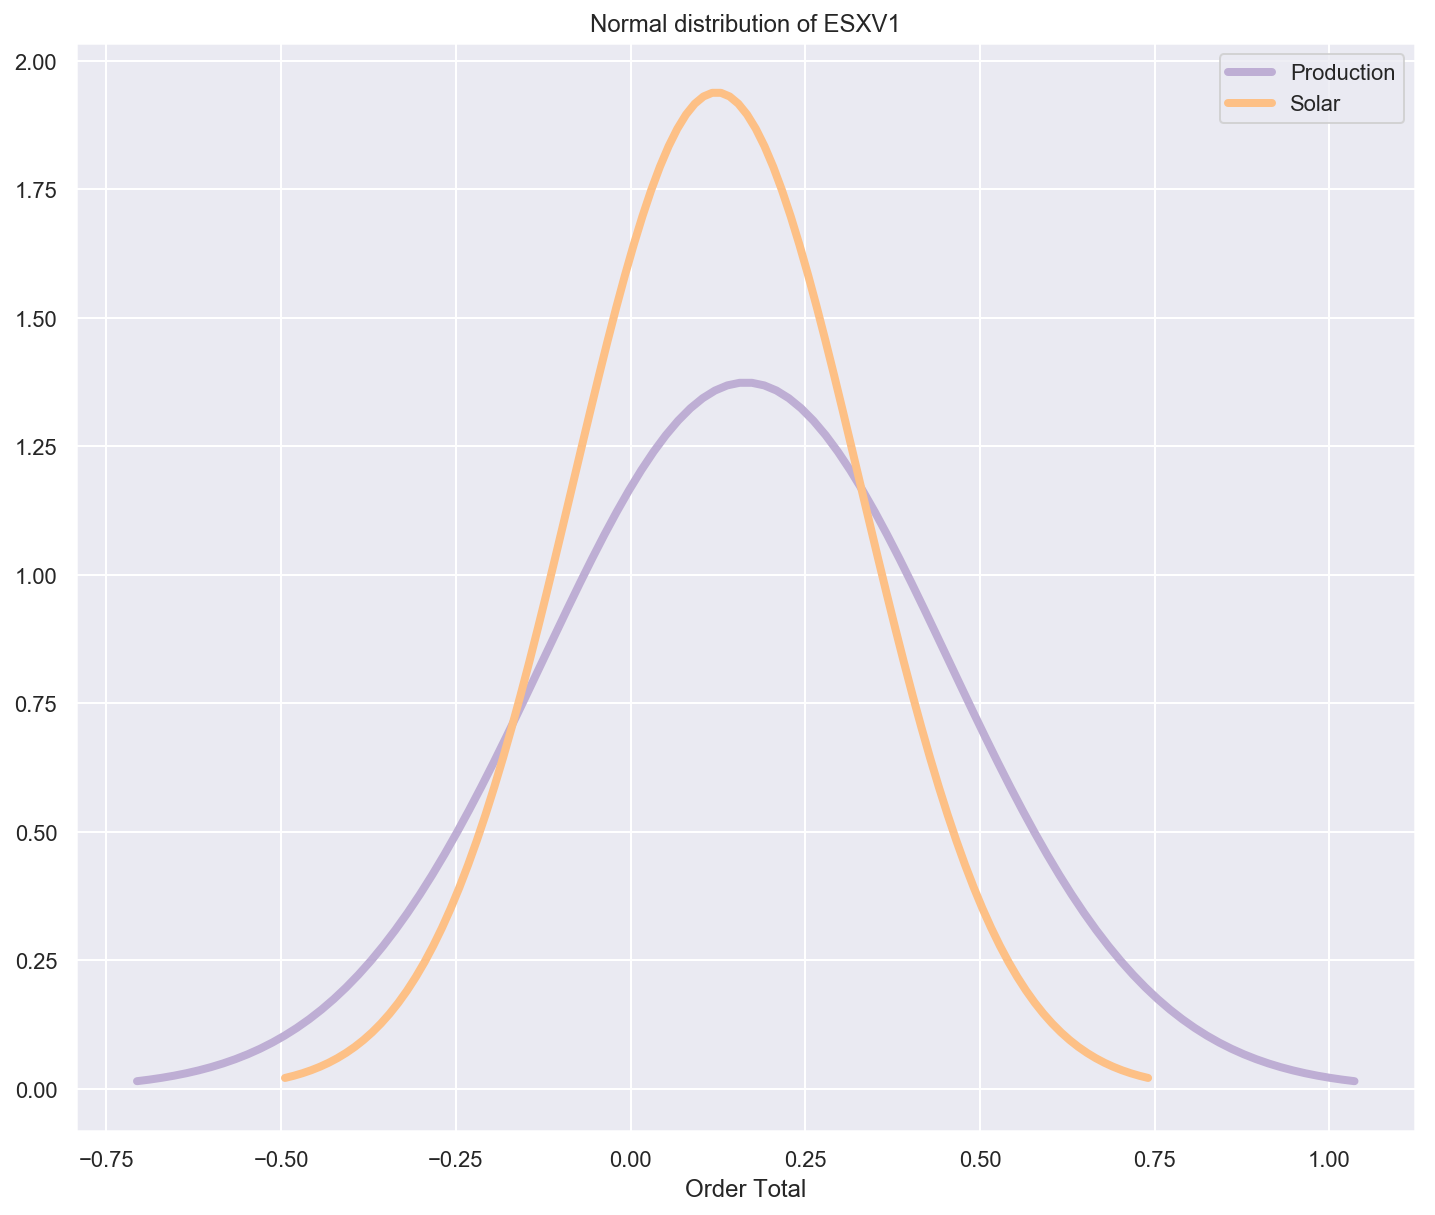

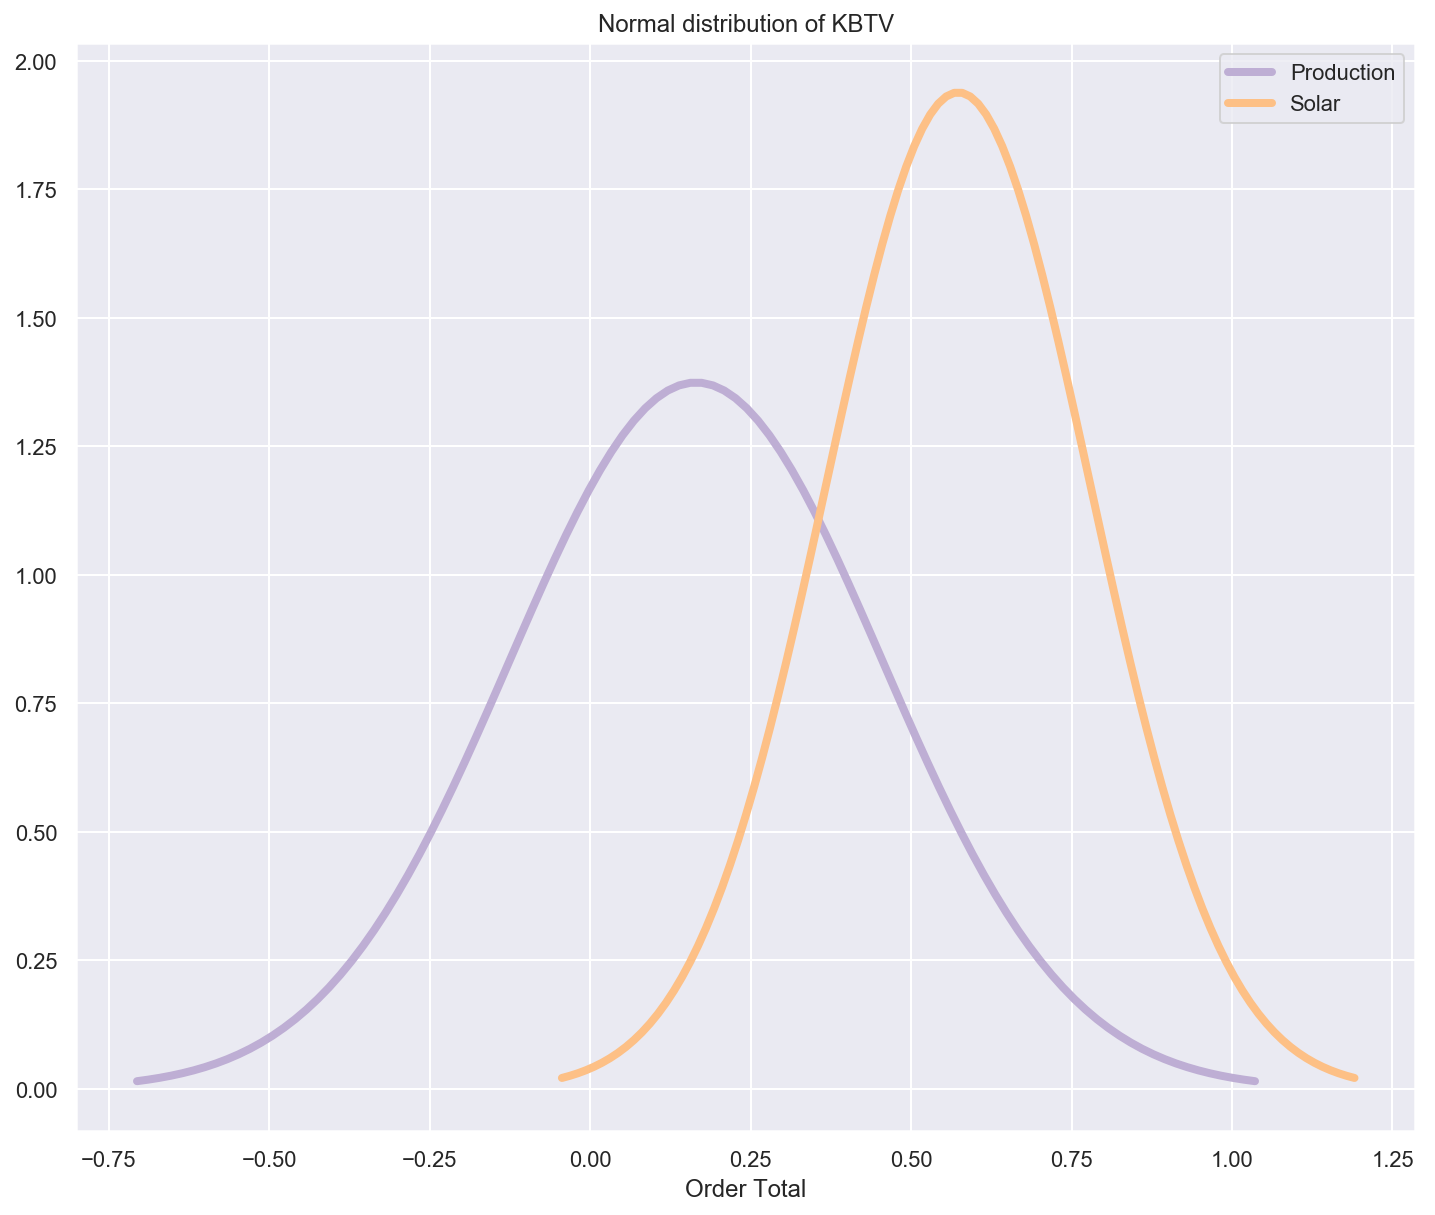

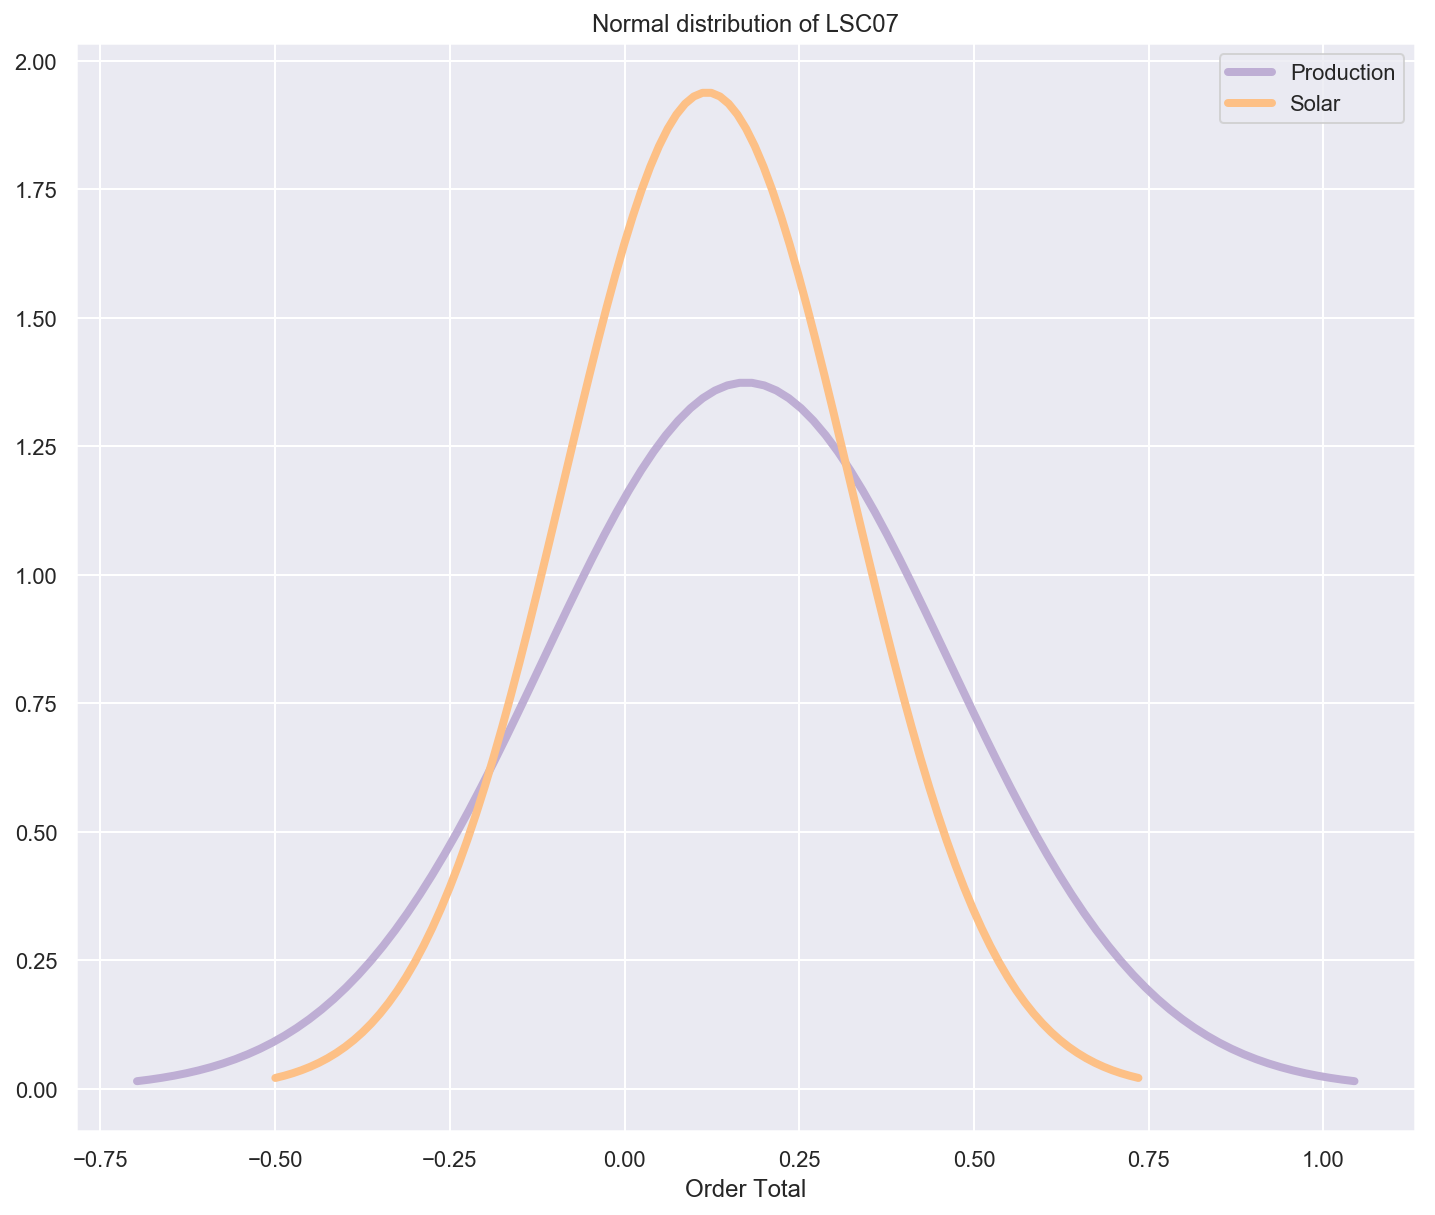

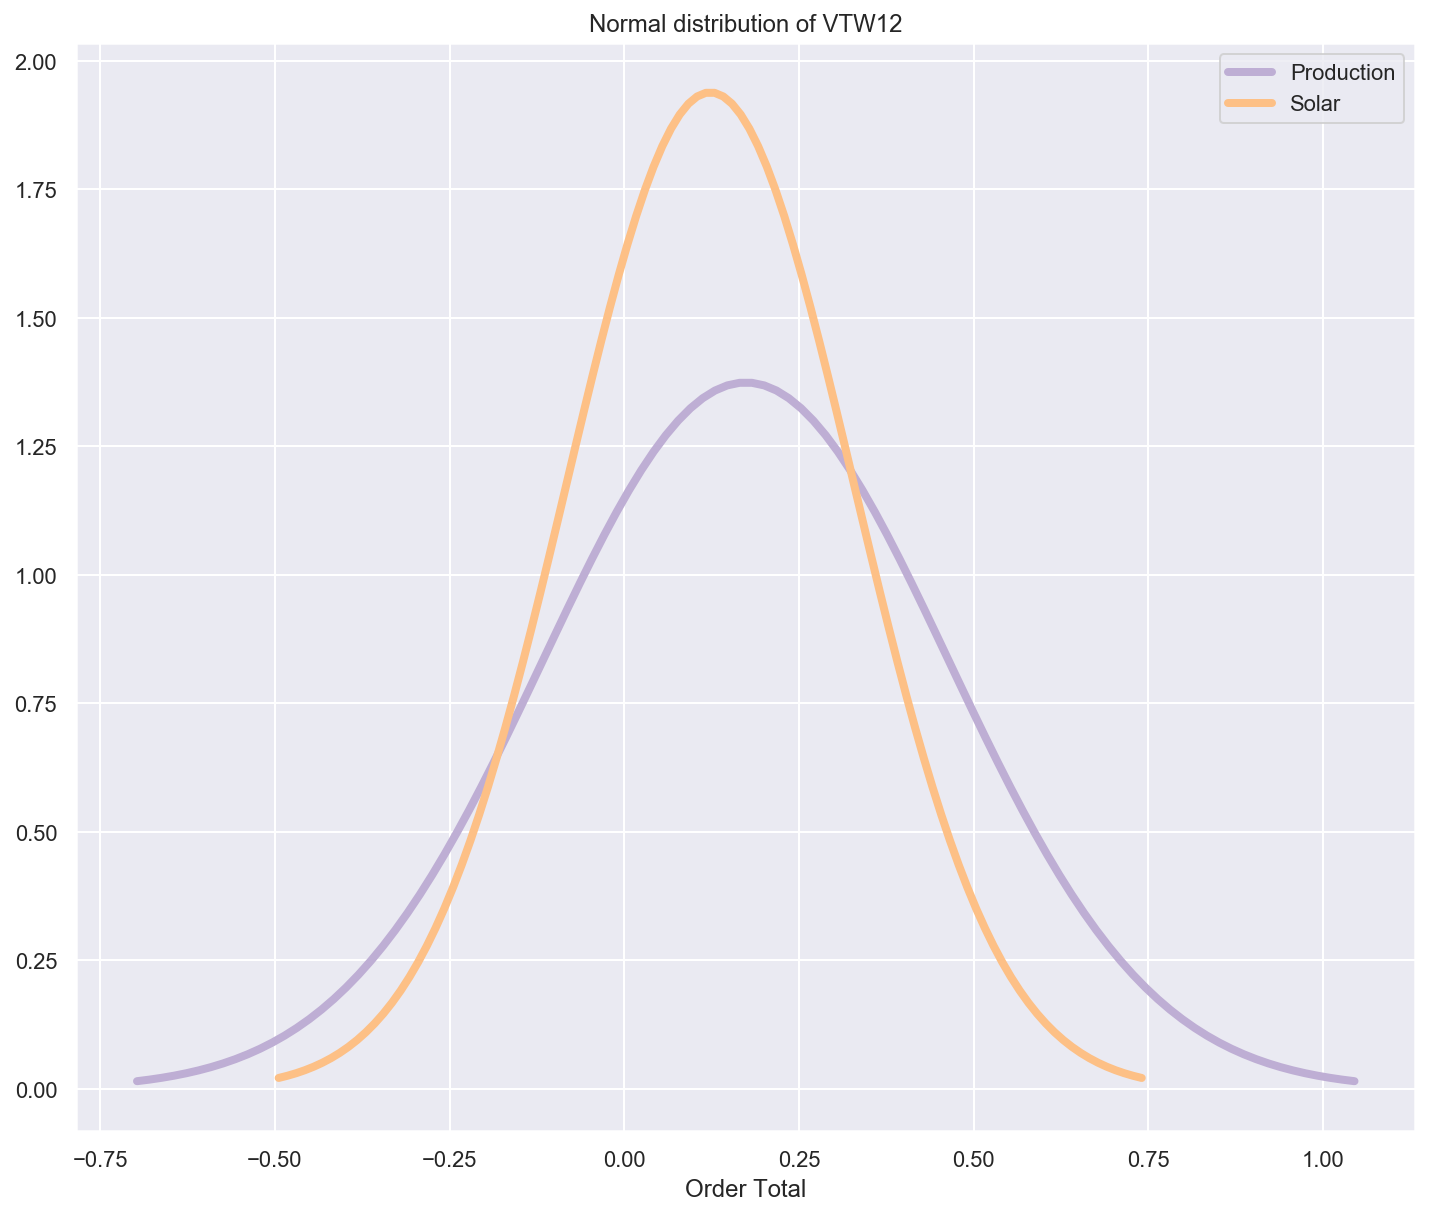

In [50]:
for idx, val in enumerate(normalized_metrics):
    mu1 = val[0].mean()
    mu2 = val[1].mean()
    prod_rv = scipy.stats.norm(mu1, std1)
    solar_rv = scipy.stats.norm(mu2, std2)
    
    # Discounts
    xs, ys = evaluate_PDF(prod_rv , 3)
    plt.plot(xs, ys, label='Production', linewidth=4, color='#beaed4') 

    #No Discounts
    xs, ys = evaluate_PDF(solar_rv, 3)
    plt.plot(xs, ys, label='Solar', linewidth=4, color='#fdc086')
    plt.title(f'Normal distribution of {lazy_keys[idx]}')
    plt.xlabel('Order Total')
    plt.legend(loc='upper right')
    plt.show();

### Overlap

In [ ]:
for idx, val in enumerate(normalized_metrics):
    mu1 = val[0].mean()
    mu2 = val[1].mean()
    prod_rv = scipy.stats.norm(mu1, std1)
    solar_rv = scipy.stats.norm(mu2, std2)

In [70]:
def overlap_superiority(group1, group2):
    """Estimates overlap and superiority based on a sample.  Level Up: echo this."""
    n = len(group1 + group2)

    # Get a sample of size n from both groups
    mu1 = group1.mean()
    sd1 = group1.std(ddof=1)
    mu2 = group2.mean()
    sd2 = group2.std(ddof=1)
    group1_rv = scipy.stats.norm(mu1, std1)
    group2_rv = scipy.stats.norm(mu1, std1)
    group1_sample = len(group1)
    group2_sample = len(group2)
    
    # Identify the threshold between samples
    thresh = (mu1 + mu2) / 2
    print(f'     Simple Threshold: {int(thresh)}\nThe midpoint between two means.')
    
    # Calculate no. of values above and below for group 1 and group 2 respectively
    above = sum(group1 < thresh)
    below = sum(group2 > thresh)
    
    # Calculate the overlap
    overlap = (above + below) / n
    
    #calculate misclassification rate
    
    misclassify = overlap / 2
    
    # Calculate probability of superiority
    superiority = sum(x > y for x, y in zip(group1, group2)) / n
    print(f'''\n     Overlap: {round(overlap,4)}\nThe total AUC.\n
    Superiority: {round(superiority*100,2)}\nProbability that a randomly chosen sample from the first (Solar Production) group is (higher) than one of the second group.\n
    Misclassification Rate: {round(misclassify,4)}\nThe chance of misclassification if using this metric alone as a predictor.''')
    

    return overlap, superiority


In [62]:
%store -r

In [71]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d


def plot_pdfs(sample1, sample2, cohen_d):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means

        """
    sample1_rv = scipy.stats.norm(sample1.mean(),sample1.std(ddof=1))
    xs, ys = evaluate_PDF(sample1_rv)
    plt.fill_between(xs, ys, label='Solar_Production', color=colors[np.random.randint(len(colors))], alpha=0.7)
    
    sample2_rv = scipy.stats.norm(sample2.mean(),sample2.std(ddof=1))
    xs, ys = evaluate_PDF(sample2_rv)
    plt.fill_between(xs, ys, label='Metric', color=colors[np.random.randint(len(colors))], alpha=0.7)
    plt.title(f'{lazy_keys[idx]} PDF')
    plt.legend(loc='upper right')
    plt.ylabel('Density')
    plt.xlabel('Distribution')
    
    overlap_superiority(sample1,sample2)
    return 


 Cohen_d: ESXV1
     Simple Threshold: 0
The midpoint between two means.

     Overlap: 0.9562
The total AUC.

    Superiority: 34.7
Probability that a randomly chosen sample from the first (Solar Production) group is (higher) than one of the second group.

    Misclassification Rate: 0.4781
The chance of misclassification if using this metric alone as a predictor.


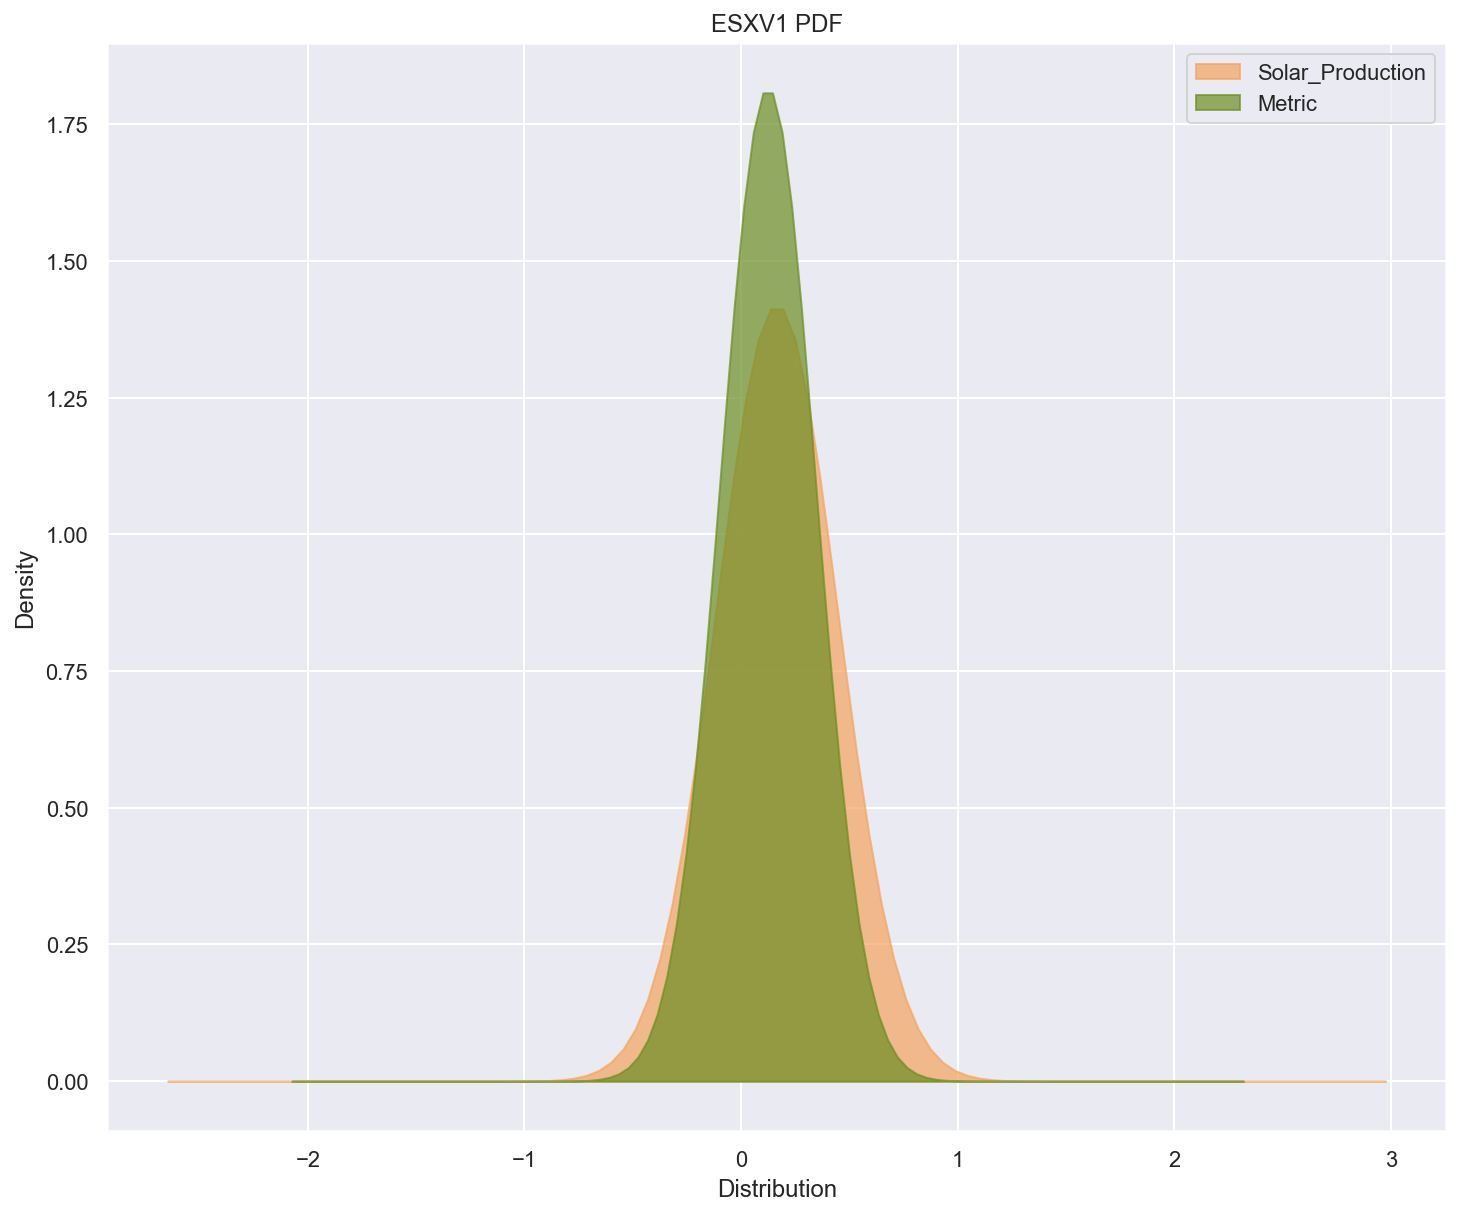

 Cohen_d: ESXV1 (Air Temp)
     Simple Threshold: 0
The midpoint between two means.

     Overlap: 1.6825
The total AUC.

    Superiority: 9.73
Probability that a randomly chosen sample from the first (Solar Production) group is (higher) than one of the second group.

    Misclassification Rate: 0.8413
The chance of misclassification if using this metric alone as a predictor.


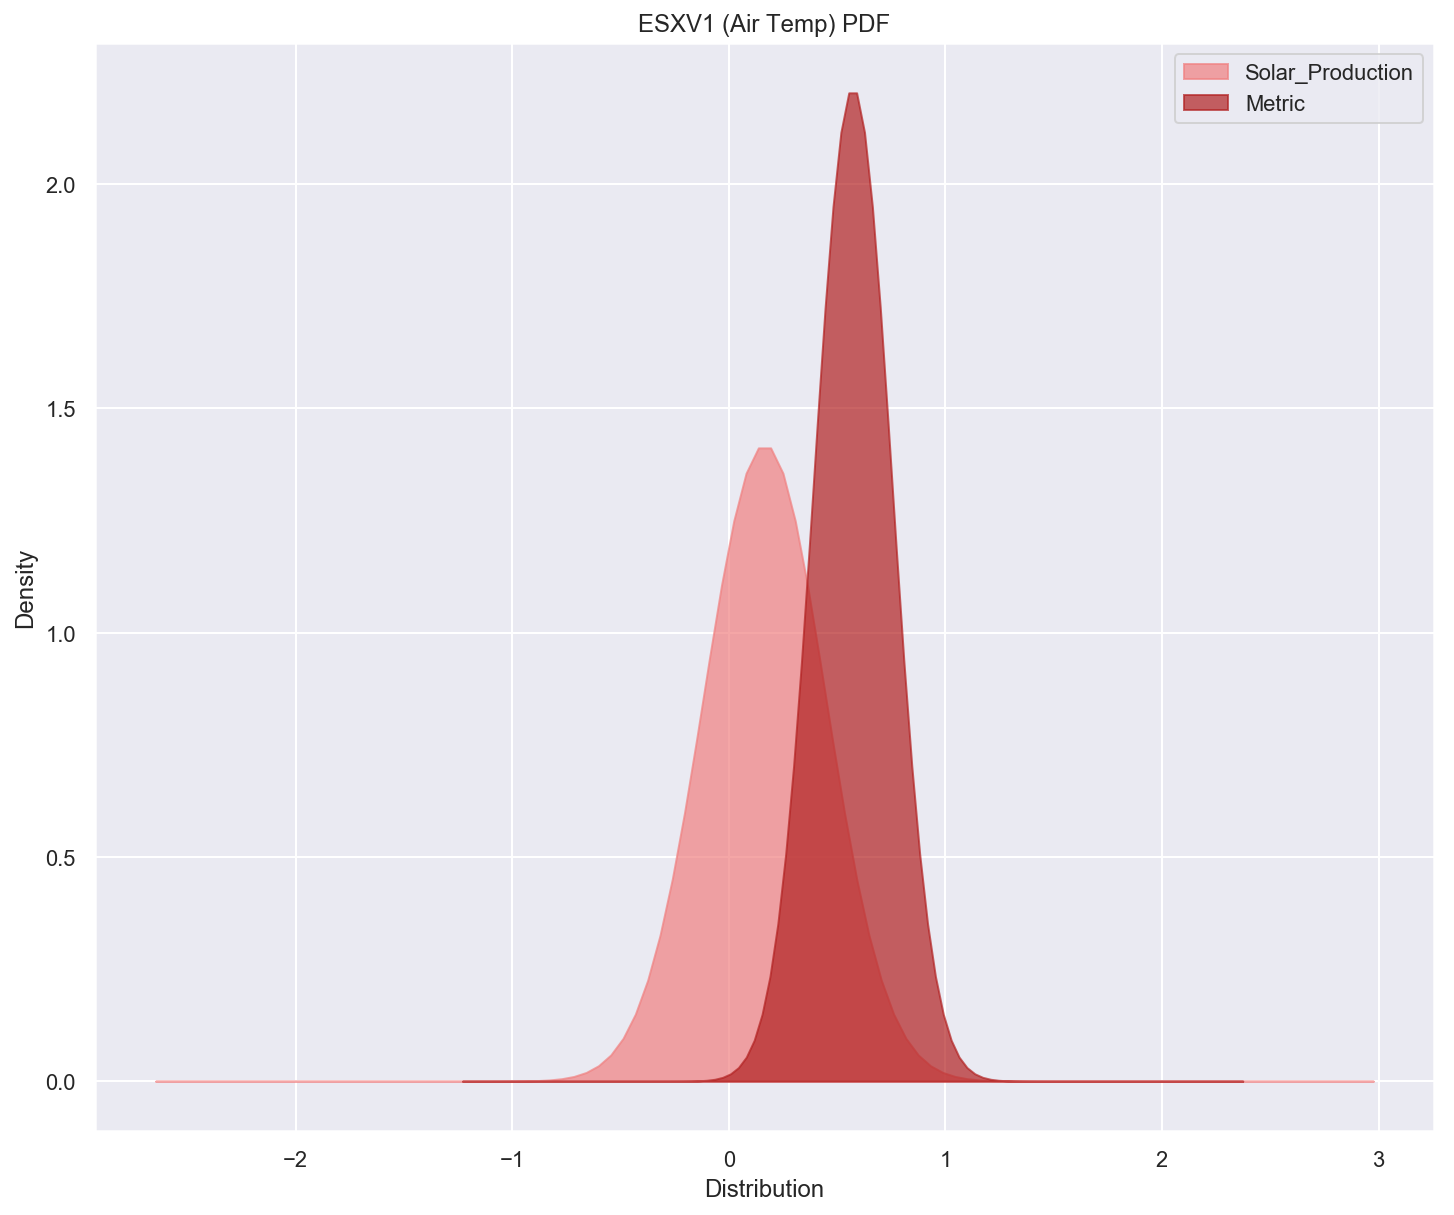

 Cohen_d: KBTV (Air Temp)
     Simple Threshold: 0
The midpoint between two means.

     Overlap: 1.6776
The total AUC.

    Superiority: 9.54
Probability that a randomly chosen sample from the first (Solar Production) group is (higher) than one of the second group.

    Misclassification Rate: 0.8388
The chance of misclassification if using this metric alone as a predictor.


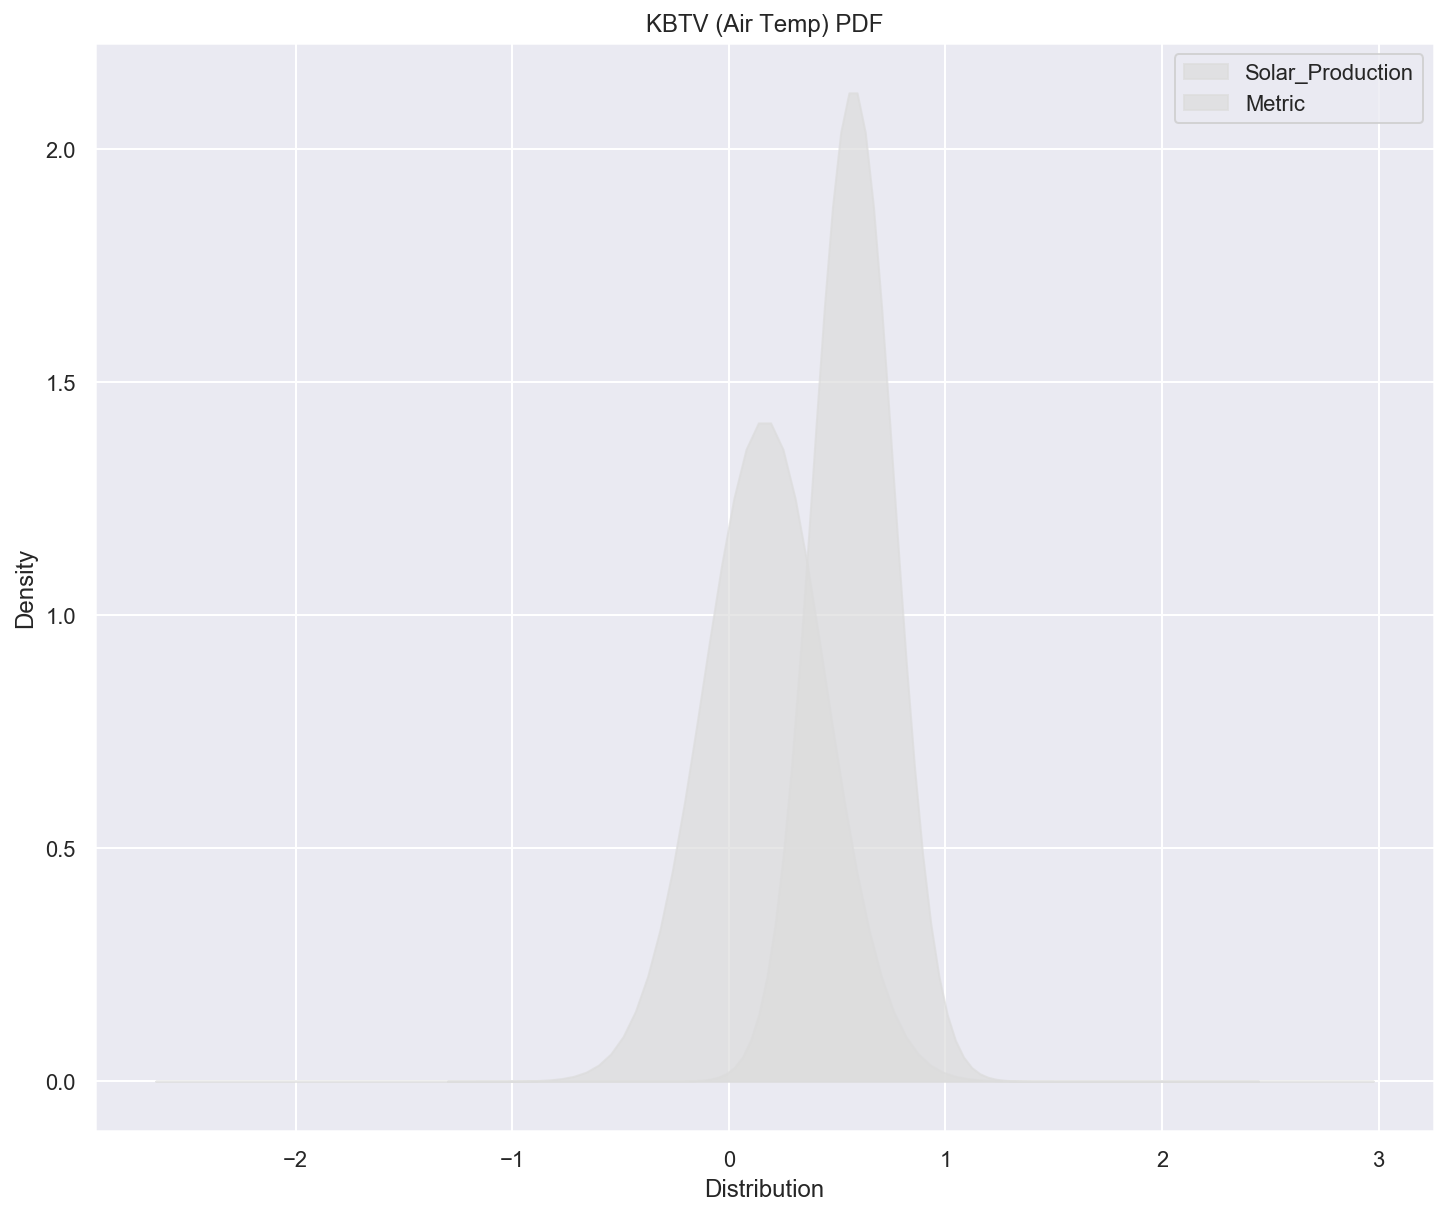

 Cohen_d: LSC07
     Simple Threshold: 0
The midpoint between two means.

     Overlap: 0.9593
The total AUC.

    Superiority: 80.02
Probability that a randomly chosen sample from the first (Solar Production) group is (higher) than one of the second group.

    Misclassification Rate: 0.4797
The chance of misclassification if using this metric alone as a predictor.


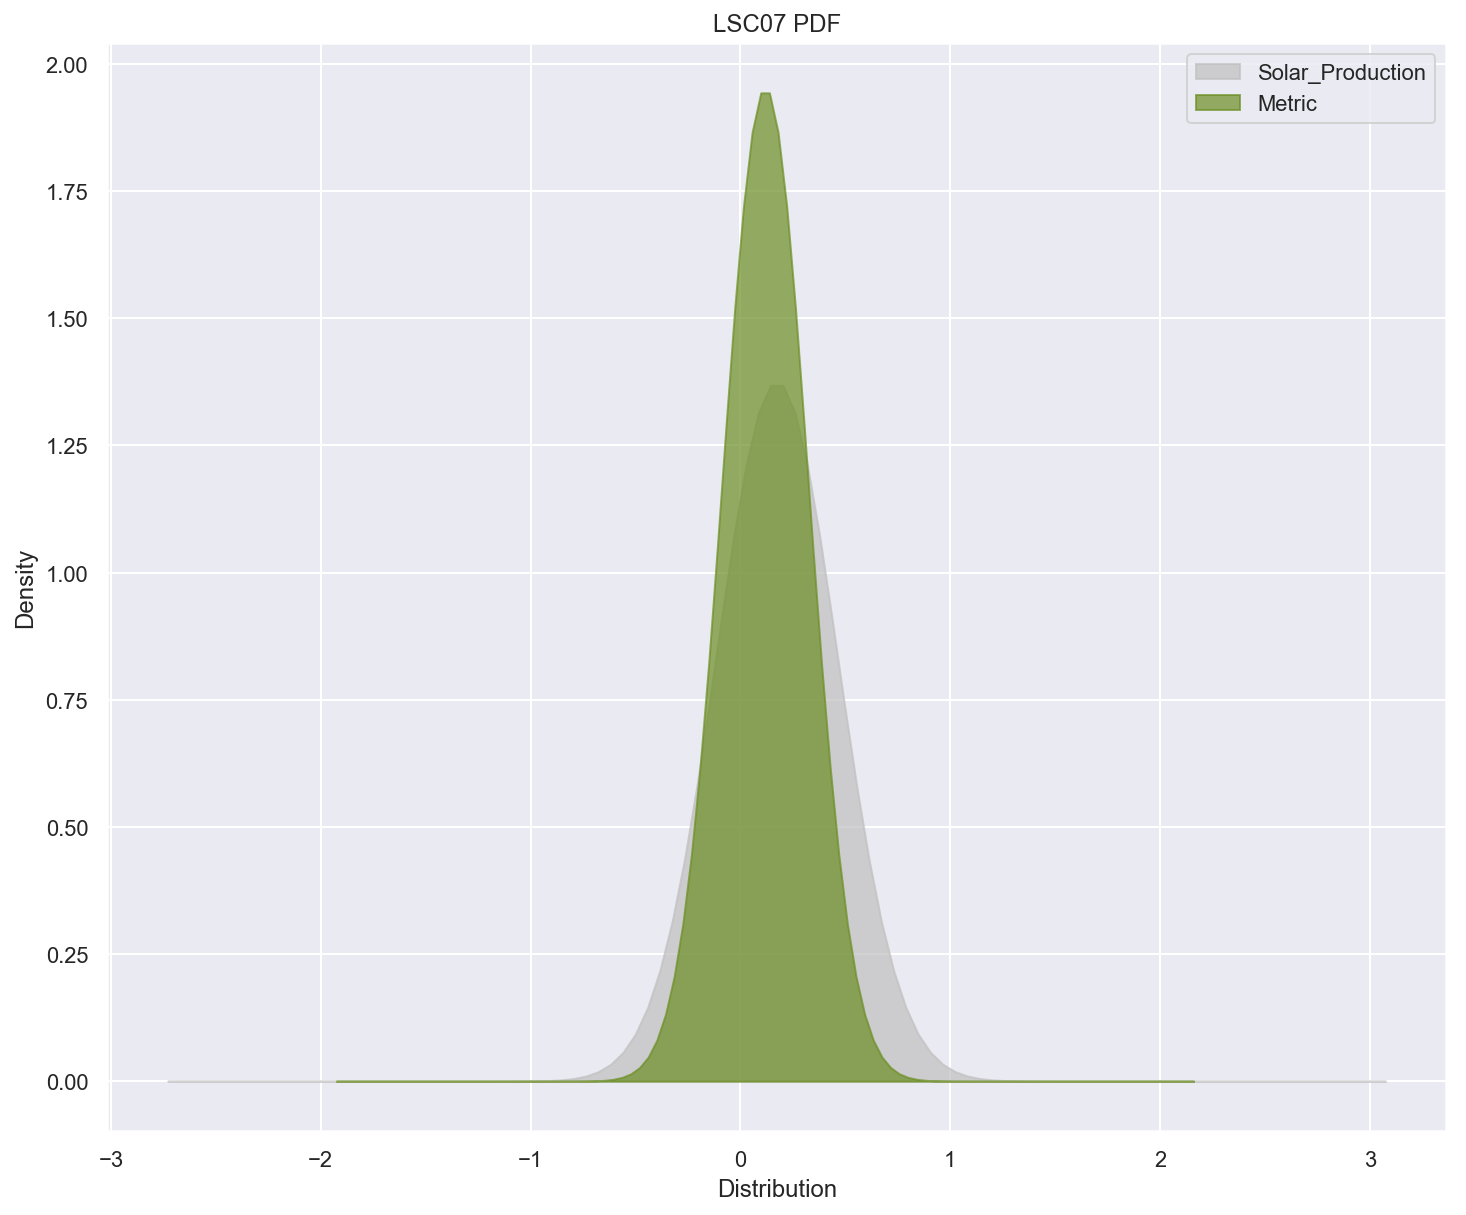

 Cohen_d: VTW12
     Simple Threshold: 0
The midpoint between two means.

     Overlap: 0.9604
The total AUC.

    Superiority: 52.6
Probability that a randomly chosen sample from the first (Solar Production) group is (higher) than one of the second group.

    Misclassification Rate: 0.4802
The chance of misclassification if using this metric alone as a predictor.


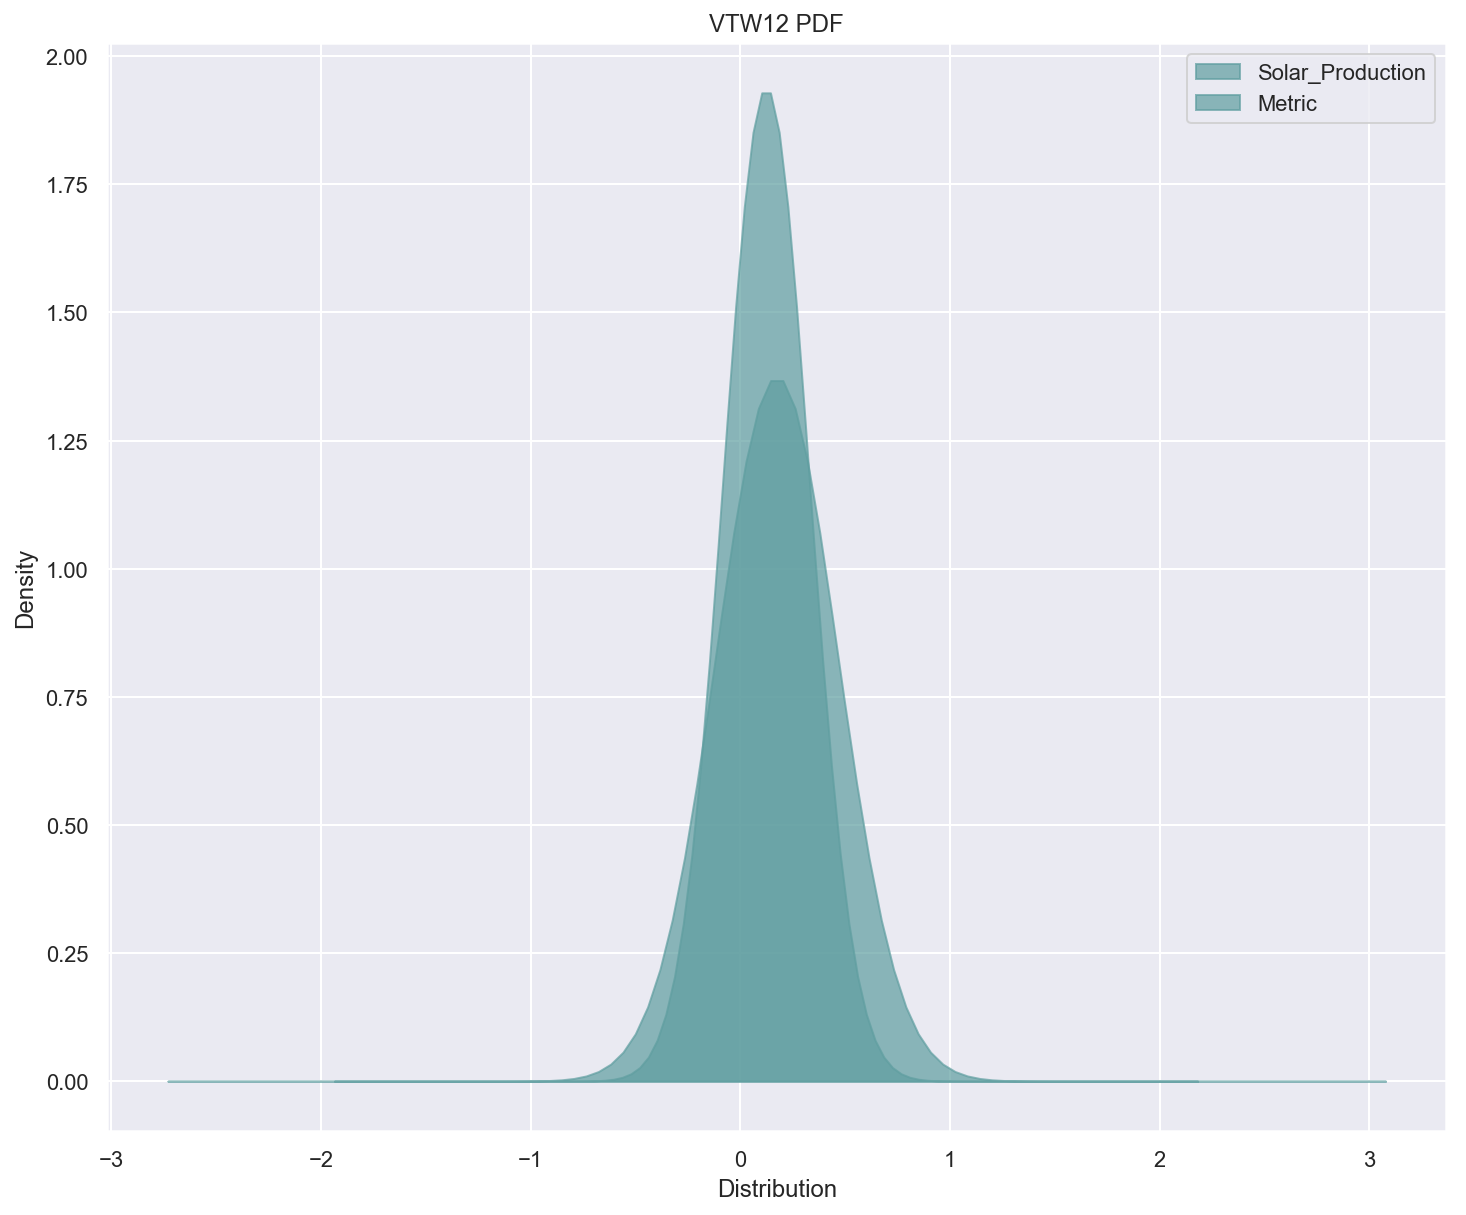

In [72]:
for idx, val in enumerate(normalized_metrics):

    print(f' Cohen_d: {lazy_keys[idx]}')
    dd = Cohen_d(val[0], val[1])
    plot_pdfs(val[0], val[1], cohen_d = dd)
    plt.show();

### Non-Parametric Tests

In [74]:
first_diff = (normalized_metrics[0][0].mean() - normalized_metrics[0][1].mean())
first_diff

0.04176795139527405

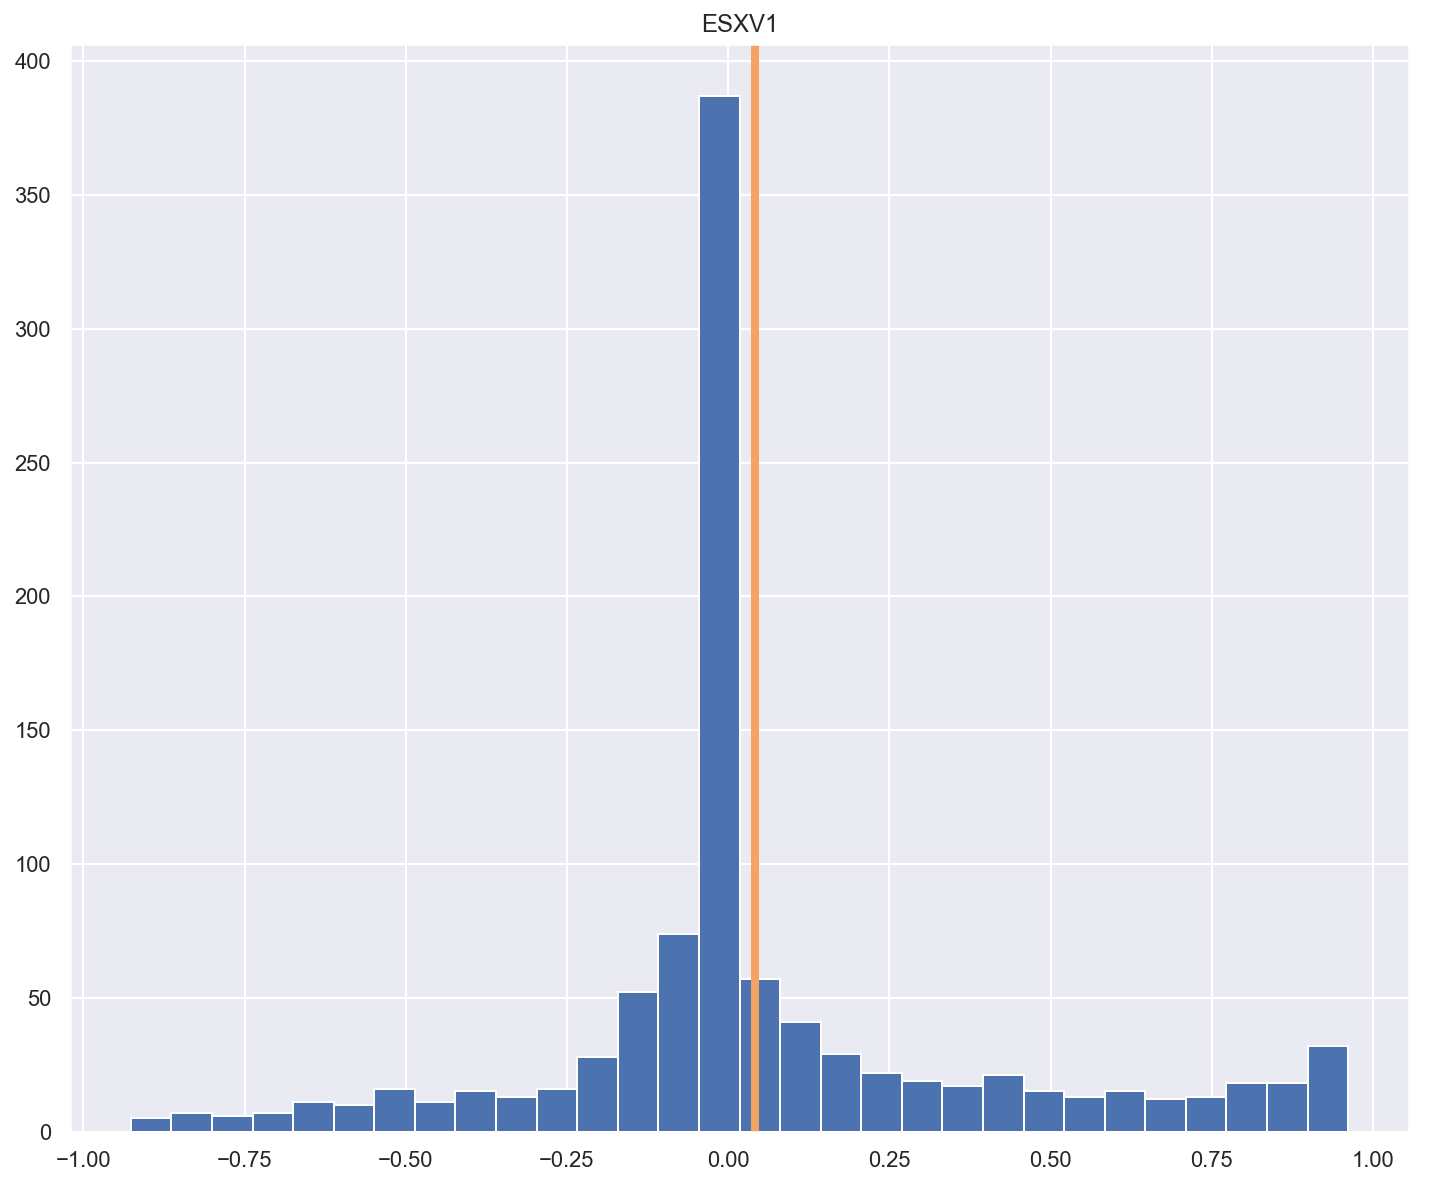

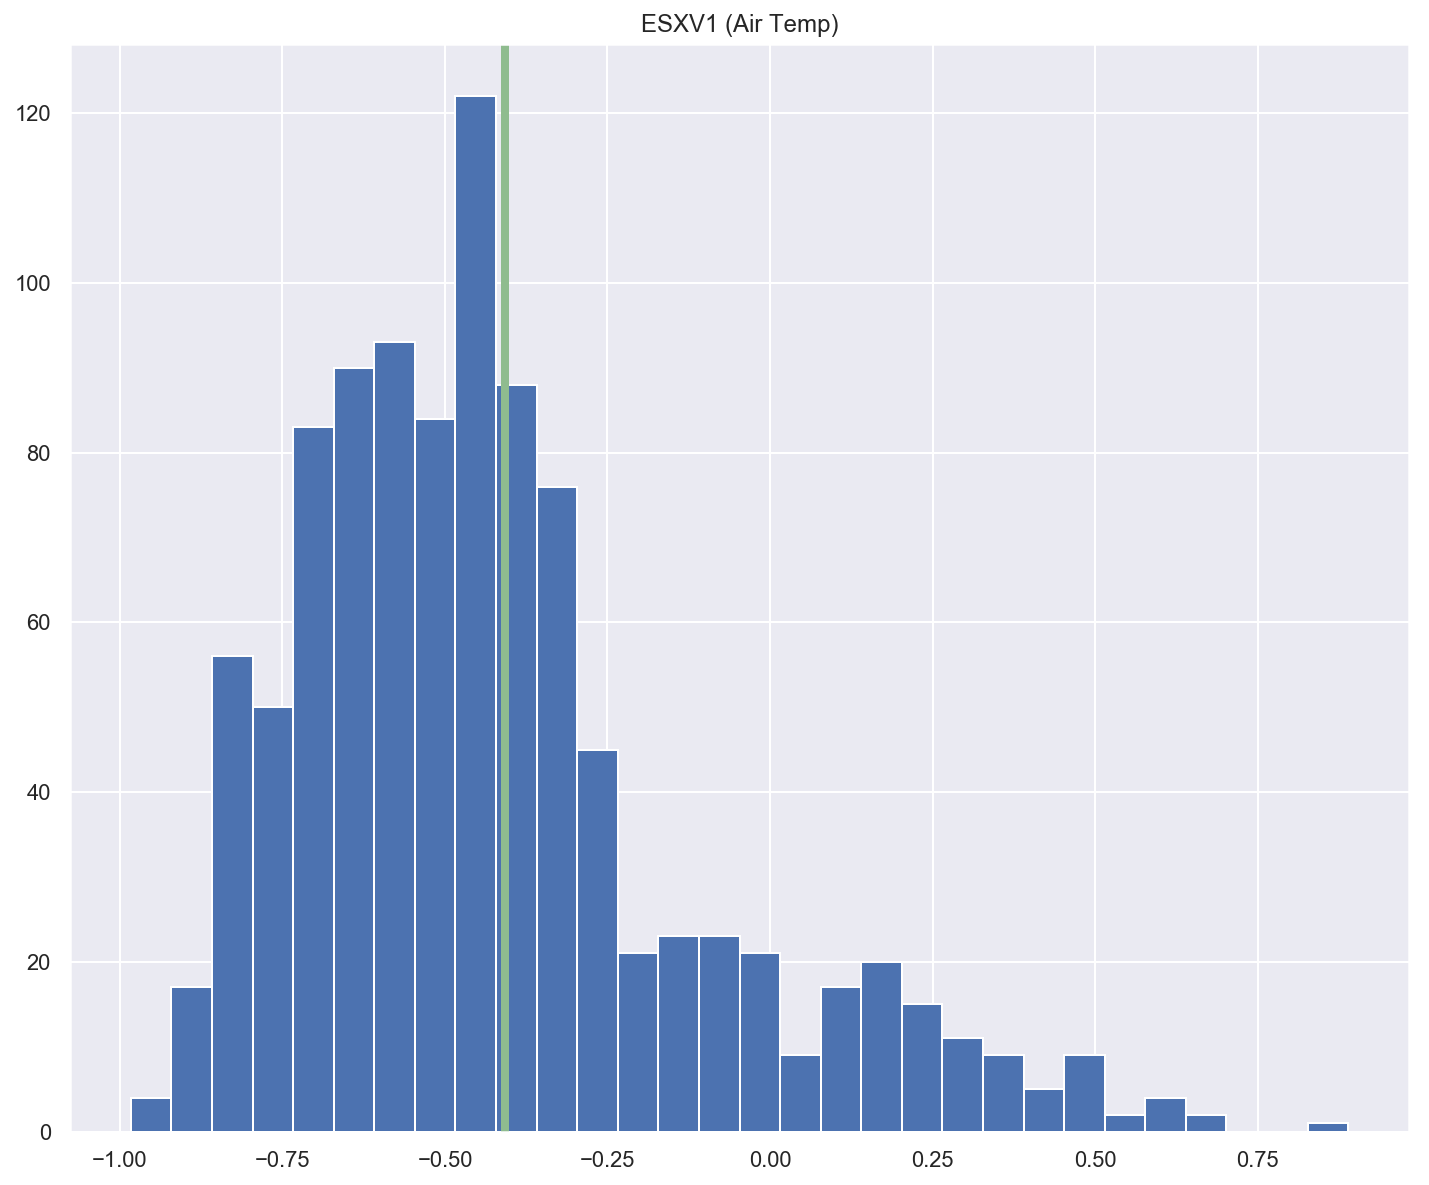

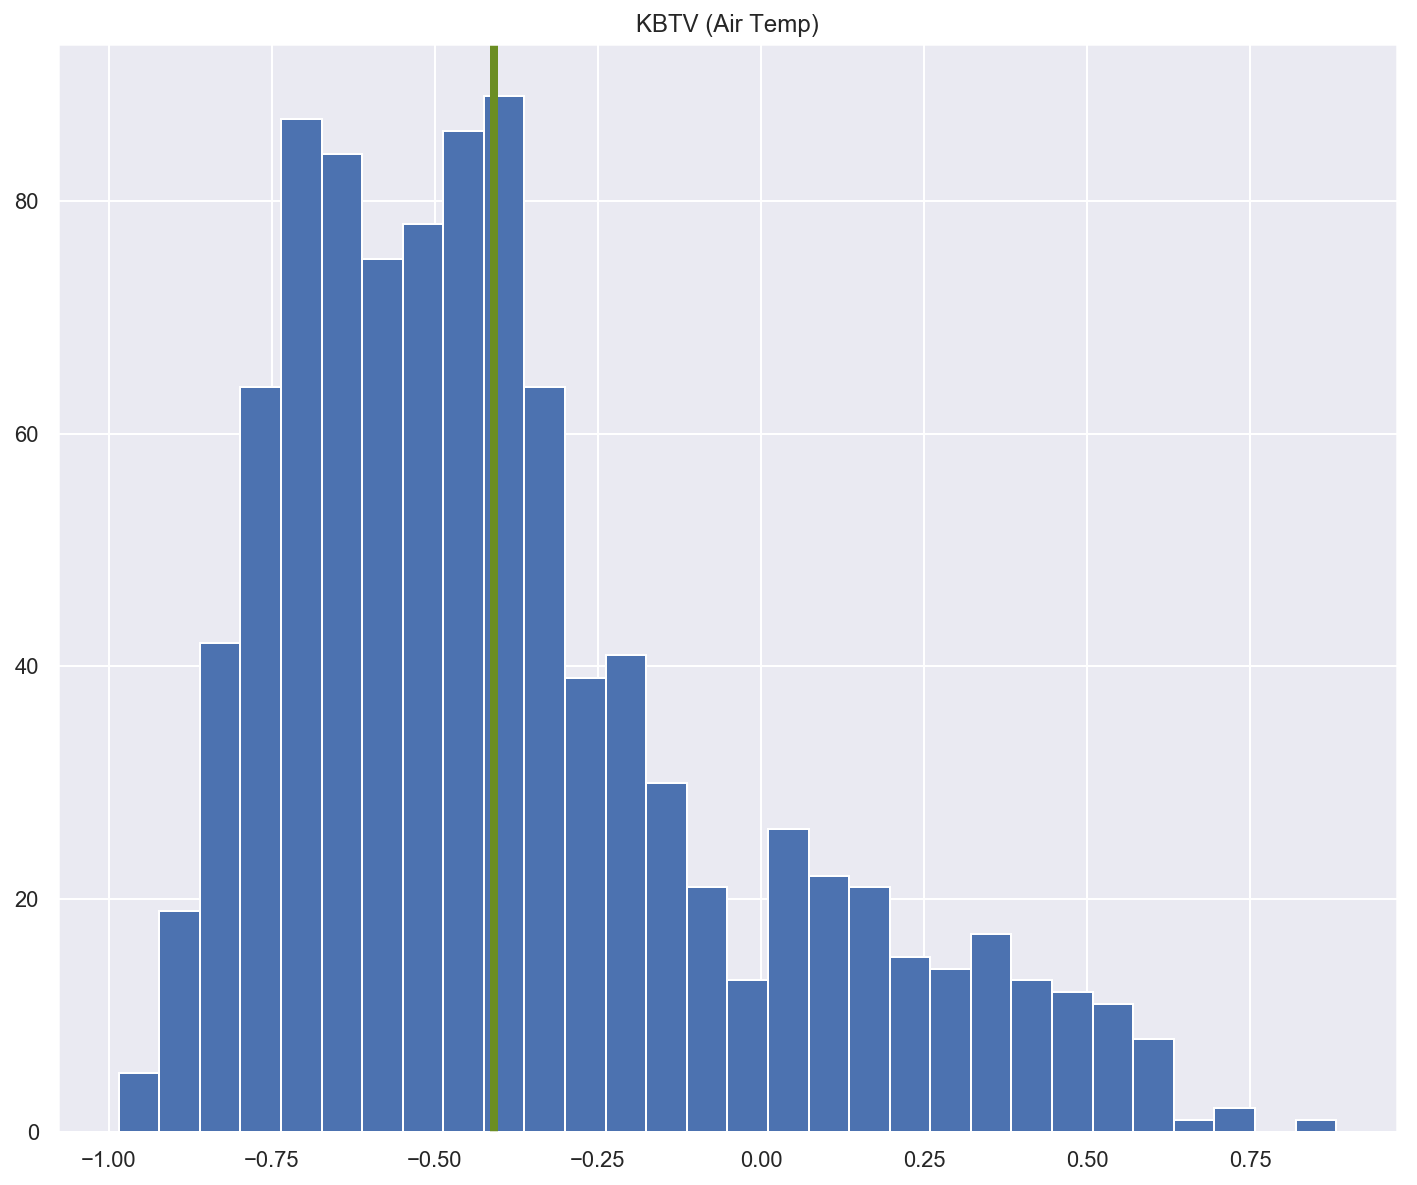

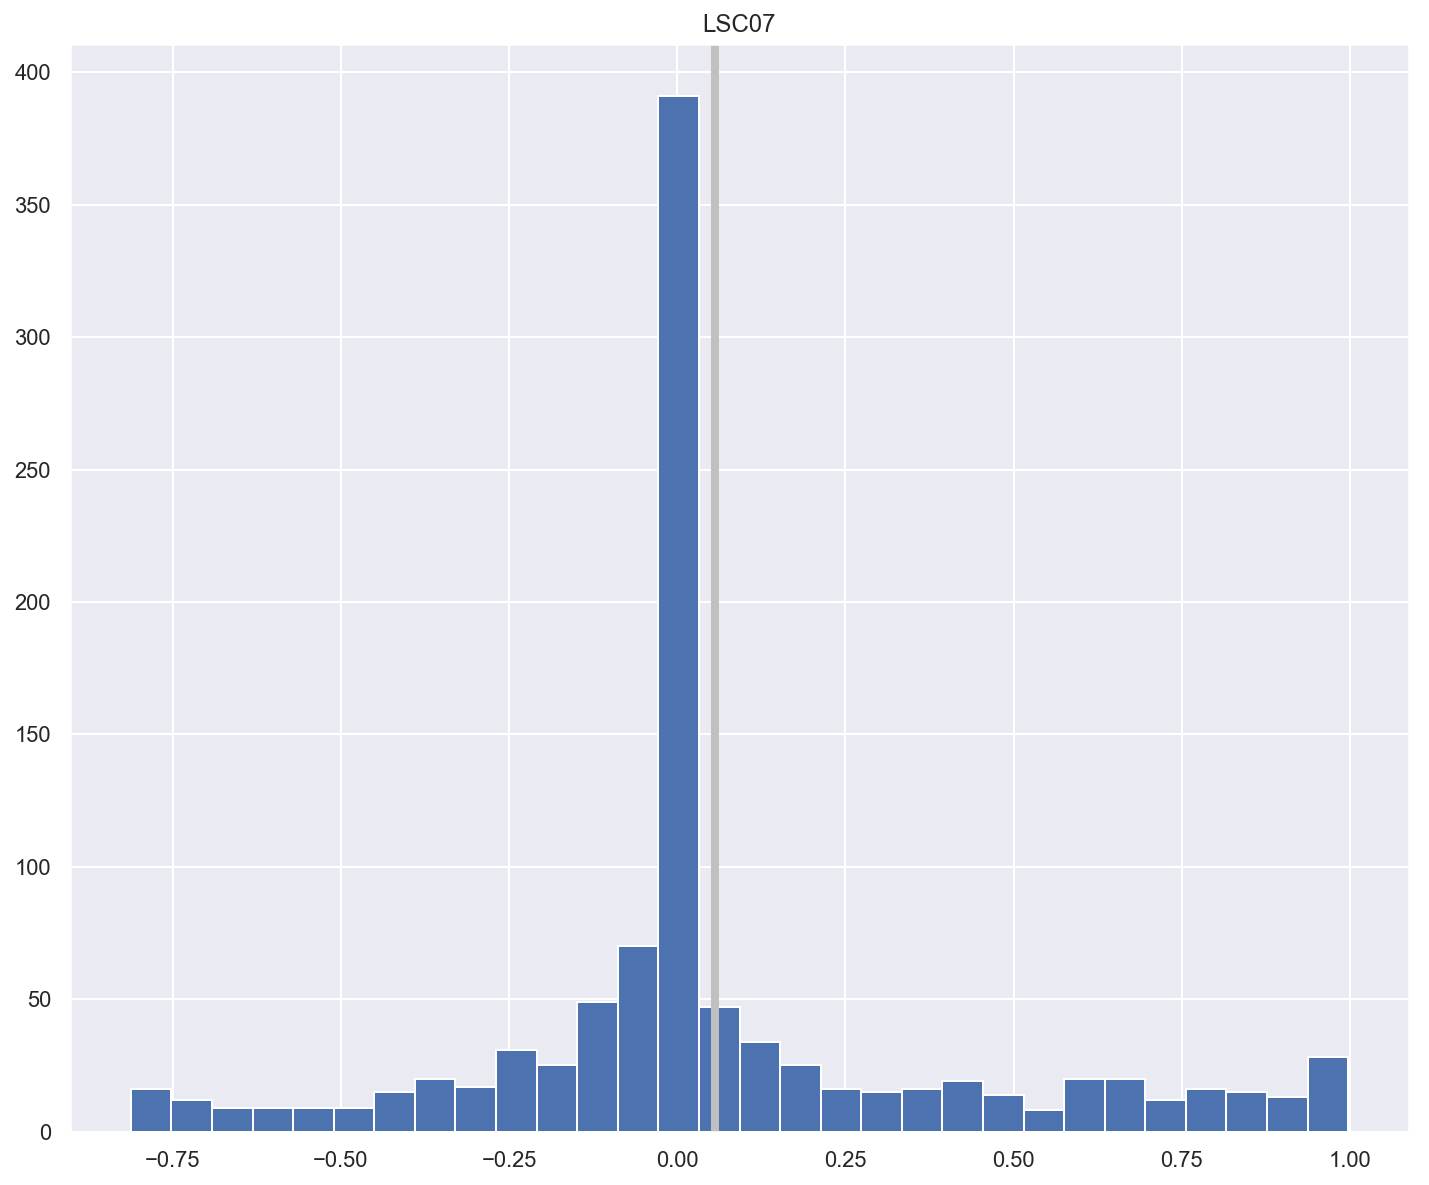

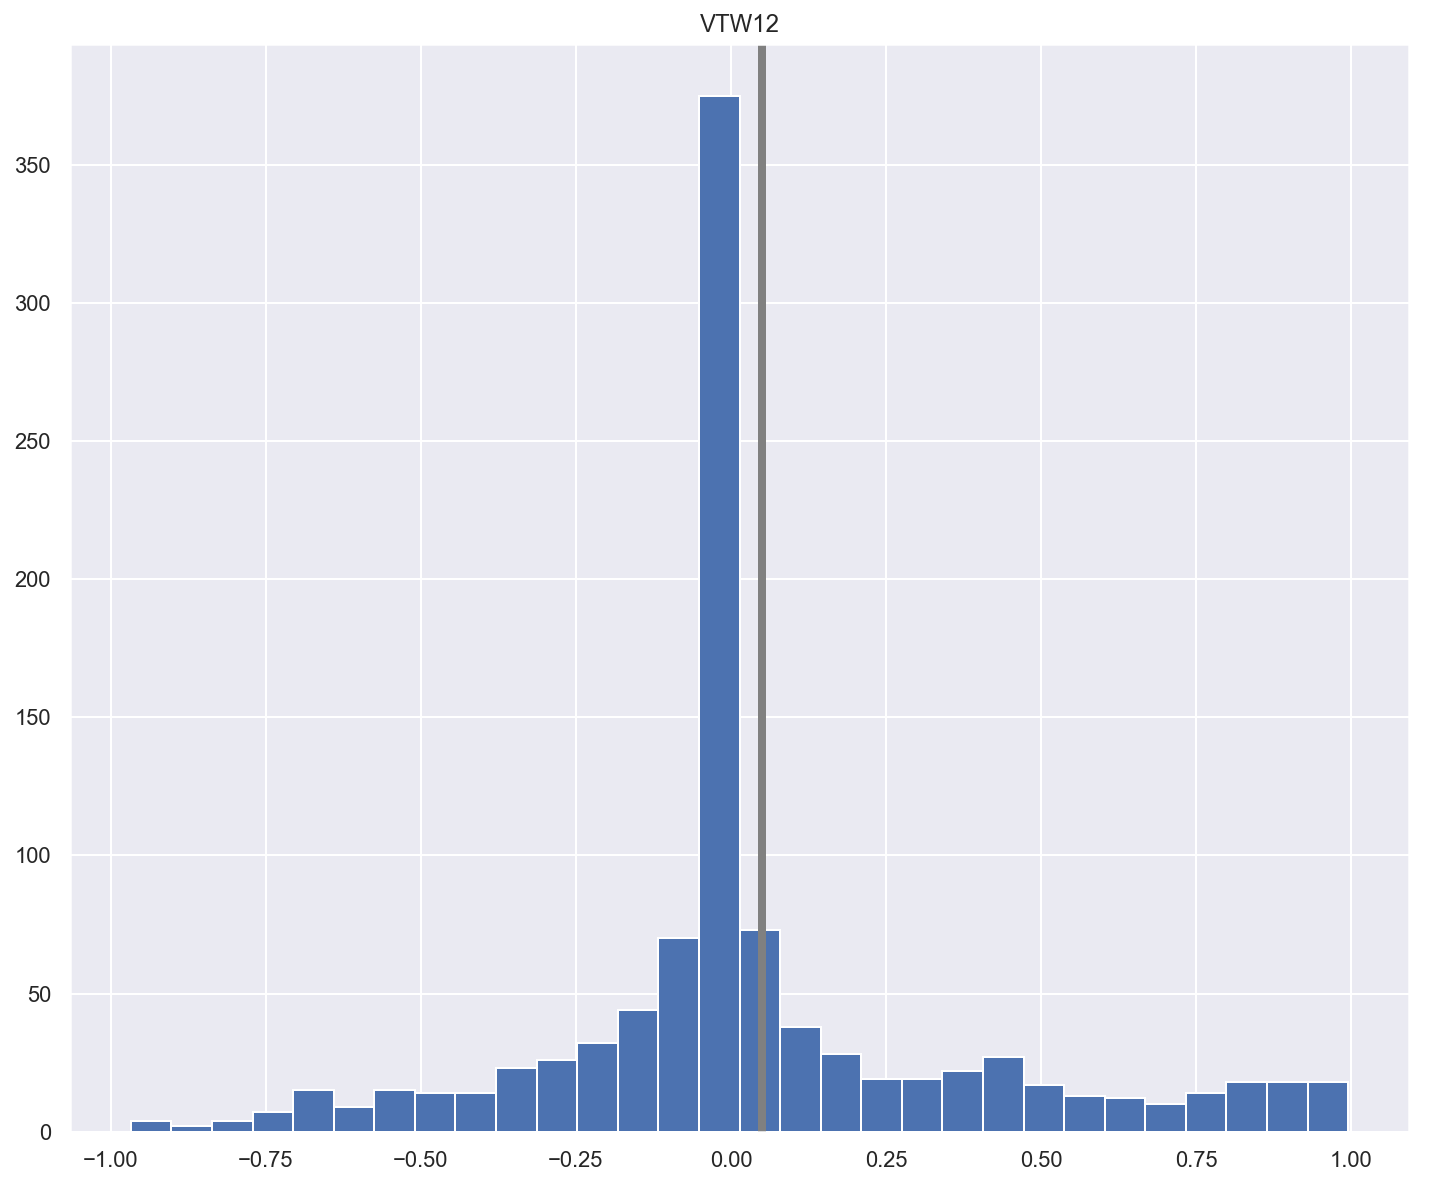

In [81]:

for idx, val in enumerate(normalized_metrics):
    total_diffs = []
    first_diff = (val[0].mean() - val[1].mean())
    for i in range(1000):
        solar_samp = val[0].sample()
        others_samp = val[1].sample()
        diff = solar_samp.mean() - others_samp.mean()
        total_diffs.append(diff)
        plt.title(f'{lazy_keys[idx]}')
    plt.hist(total_diffs, bins=30)
    plt.axvline(first_diff, c=colors[np.random.randint(len(colors))], lw=4)
#     plt.sav_fig(f'{lazy_keys[idx]}')
    plt.show();

In [ ]:
meat_sample = categories['Order Total'].sample(int(categories.shape[0]/2))
others_sample = categories['Order Total'].drop(meat_sample.index, axis=0)
others_sample.shape

## Distributions

In [14]:
lsc07.columns

Index(['Top. azimuth angle (eastward from N)',
       'Top. azimuth angle (westward from S)', 'Topocentric zenith angle',
       'air_temp_set_1', 'altimeter_set_1', 'dew_point_temperature_set_1d',
       'kWh', 'precip_accum_24_hour_set_1',
       'precip_accum_since_local_midnight_set_1', 'pressure_set_1d',
       'relative_humidity_set_1', 'sea_level_pressure_set_1d',
       'solar_radiation_set_1', 'wind_cardinal_direction_set_1d',
       'wind_direction_set_1', 'wind_gust_set_1', 'wind_speed_set_1',
       'Timestamp_'],
      dtype='object')

In [ ]:
for column in lsc07.columns:
    plt.scatter(lsc07[column], lsc07['kWh'], label=column + " data points", color='k', size=4)
    plt.legend()
    plt.show()

### Model Visualizations

In [ ]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
plot_confusion_matrix(y_ts, y_pred,
                      classes = classes,
                      normalize=False, 
                      title='Predictions of Basic Tree Model',
                      cmap=plt.cm.Blues)
plt.savefig('Confusion Matrix')
plt.show();

In [ ]:
def plot_feature_importances(model):
    n_features = feature_importance.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center', color='orange') 
    plt.yticks(np.arange(n_features), feature_importance.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.savefig("test.png")
    plt.show();